In [1]:
# This import solve problem died kernel when torch and pyplot works both
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
from torch import load
from torch import rand
from torch.cuda import is_available
from matplotlib import pyplot as plt
import torchvision.transforms as T
from PIL import Image
from os import mkdir

In [3]:
numbers = 102

device = 'cuda:0' if is_available() else 'cpu'
print('GPU State:', device)

GPU State: cpu


In [4]:
latent_space_samples = [((rand(1, 128)-0.5) / 0.5).to(device) for k in range(25)]

In [5]:
mkdir('images')

for i in range(numbers):
    mkdir(fr'images/{str(i).zfill(3)}')
    
    
for epoch in range(numbers):
    PATH = fr'models/model_epoch_{str(epoch).zfill(3)}'
    generator = load(PATH)
    img_num = 0
    for sample in latent_space_samples:
        fake_image = generator(sample)
        fake_image = fake_image.reshape(1, 28, 28)
        transform = T.ToPILImage()
        img = transform(fake_image)
        img = img.resize((140, 140), Image.NEAREST)
        img.save(fr'images/{str(epoch).zfill(3)}/epoch_{str(epoch).zfill(3)}_img_{str(img_num).zfill(3)}.png')
        img_num += 1

C:\Users\kordian.czyzewski\AppData\Local\Temp\ipykernel_16860\649769272.py:16: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((140, 140), Image.NEAREST)


1


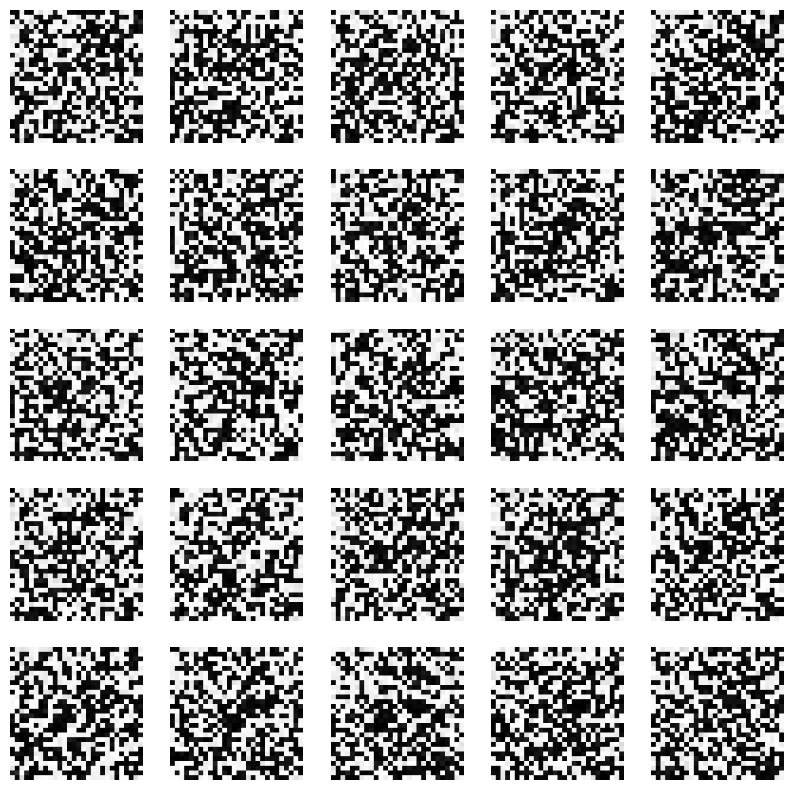

2


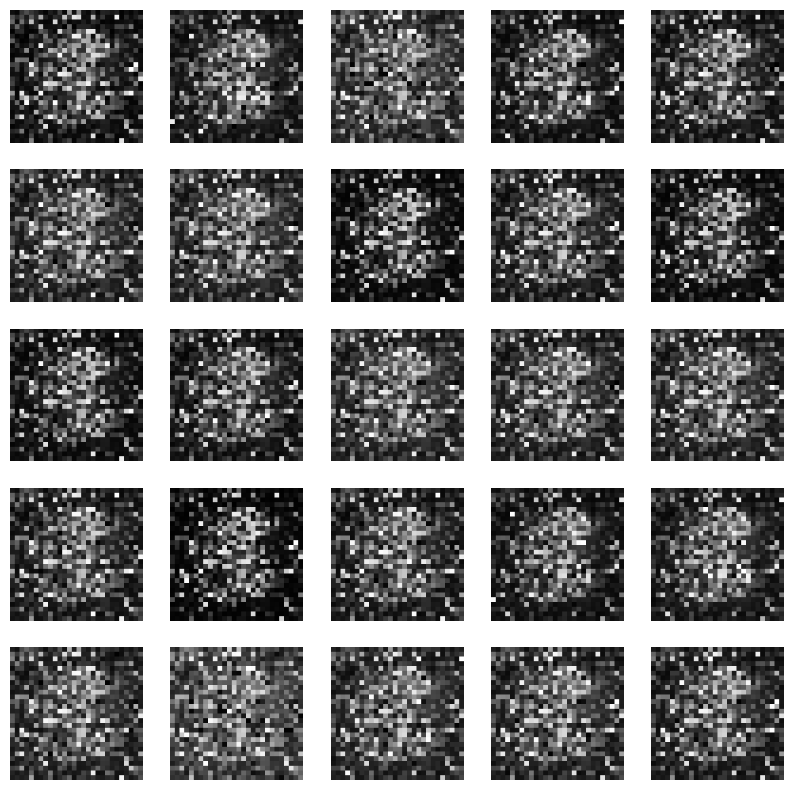

3


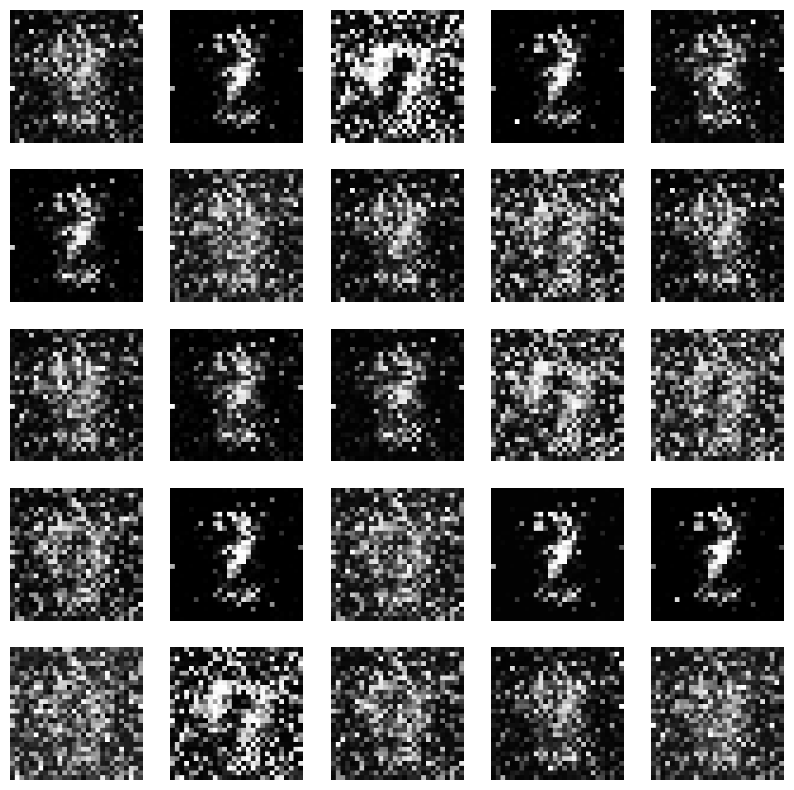

4


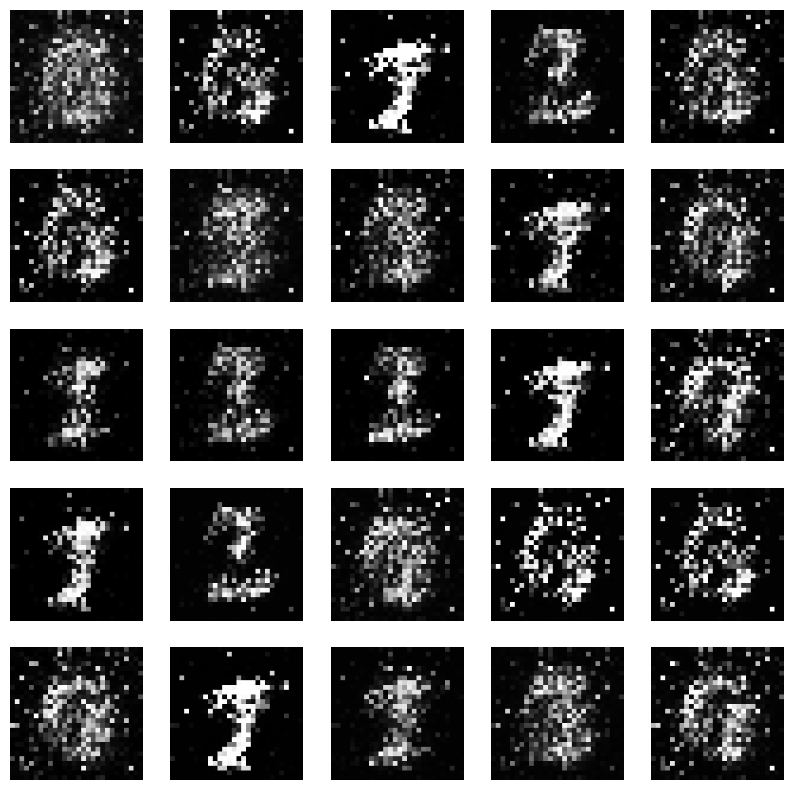

5


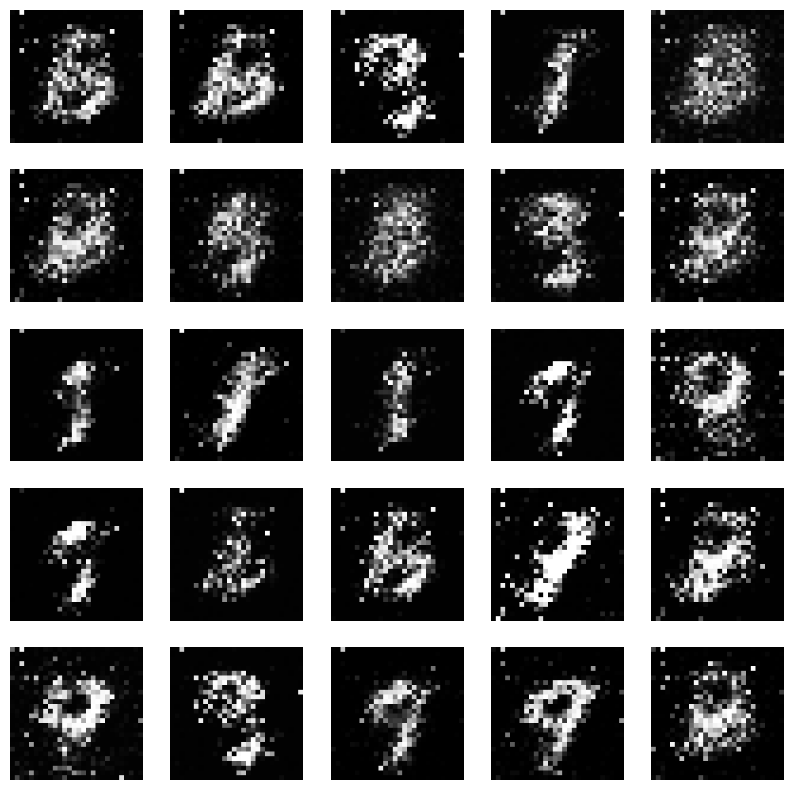

6


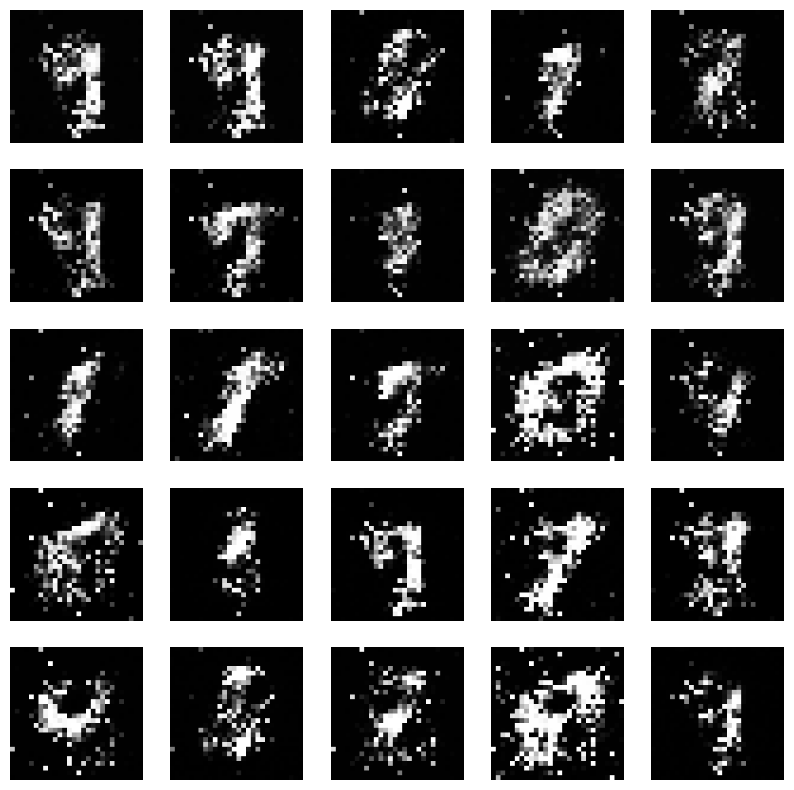

7


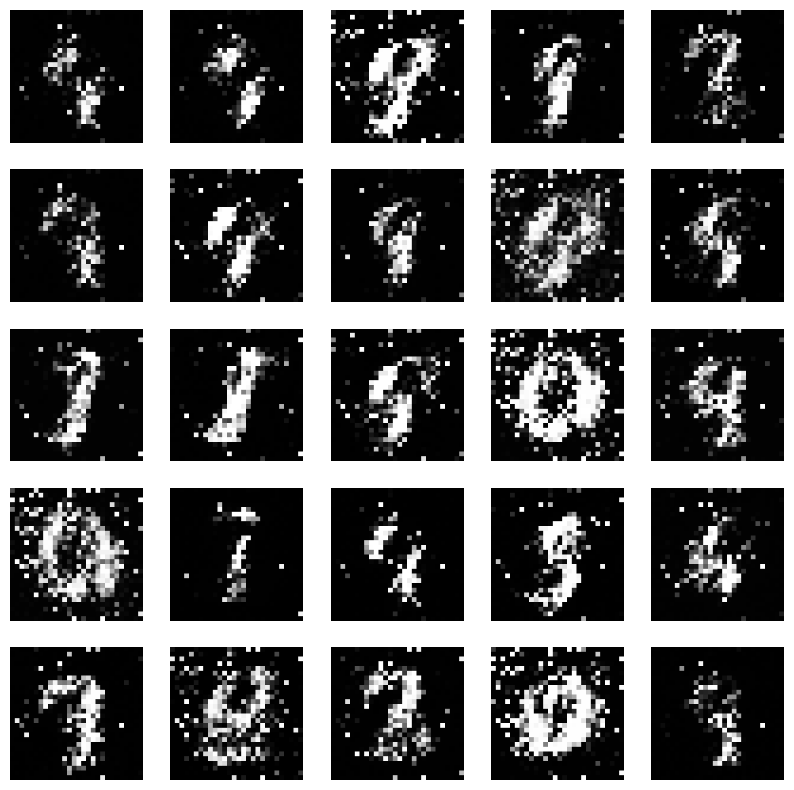

8


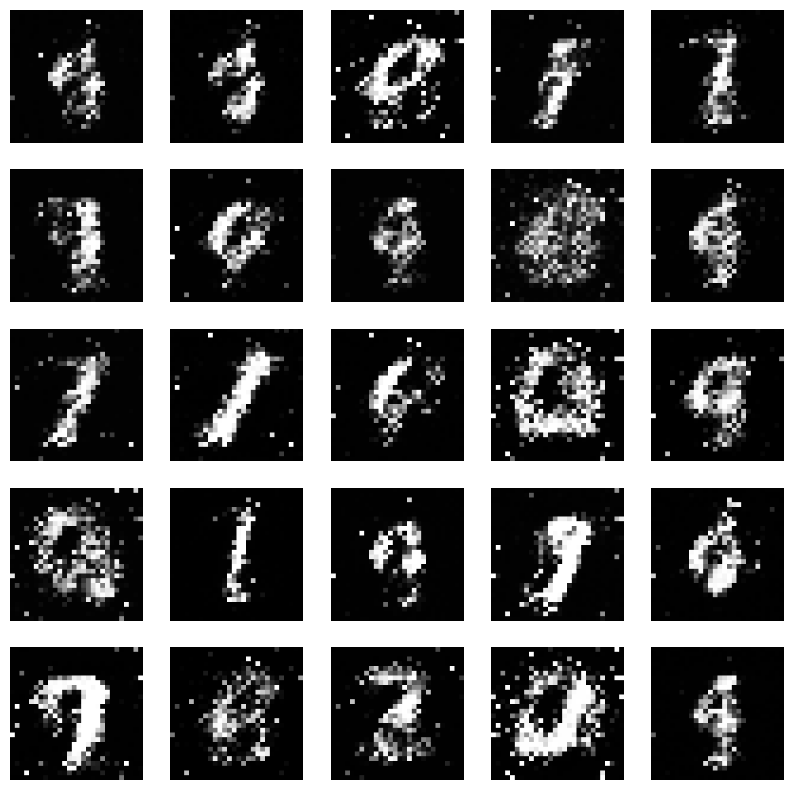

9


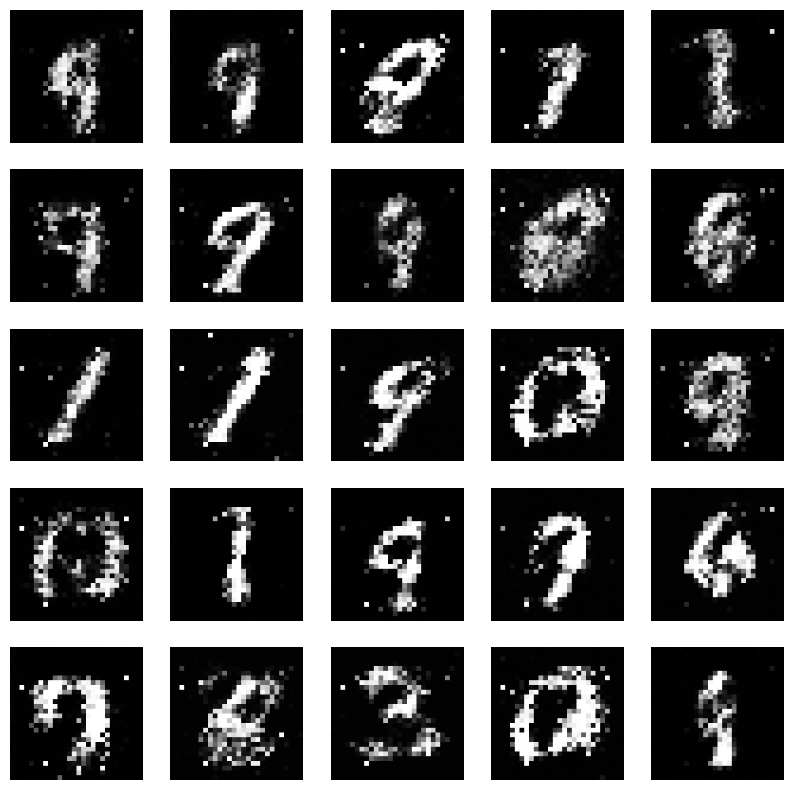

10


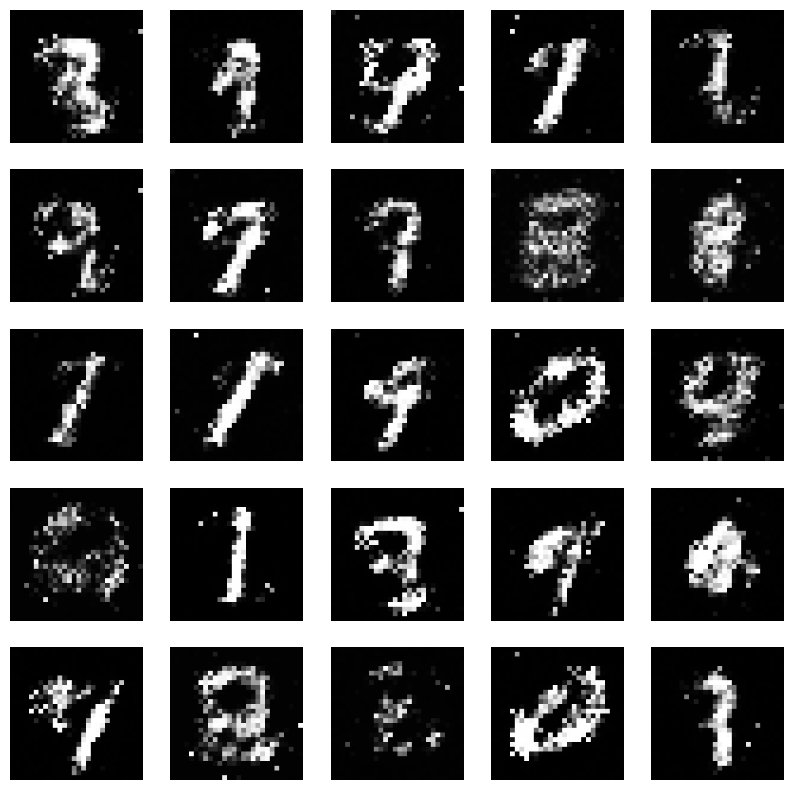

11


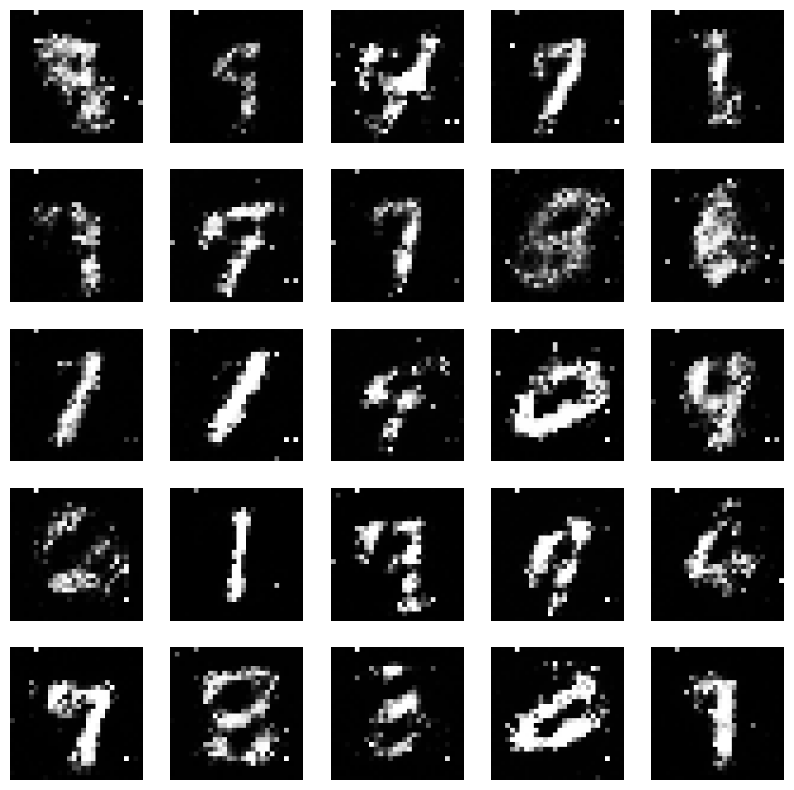

12


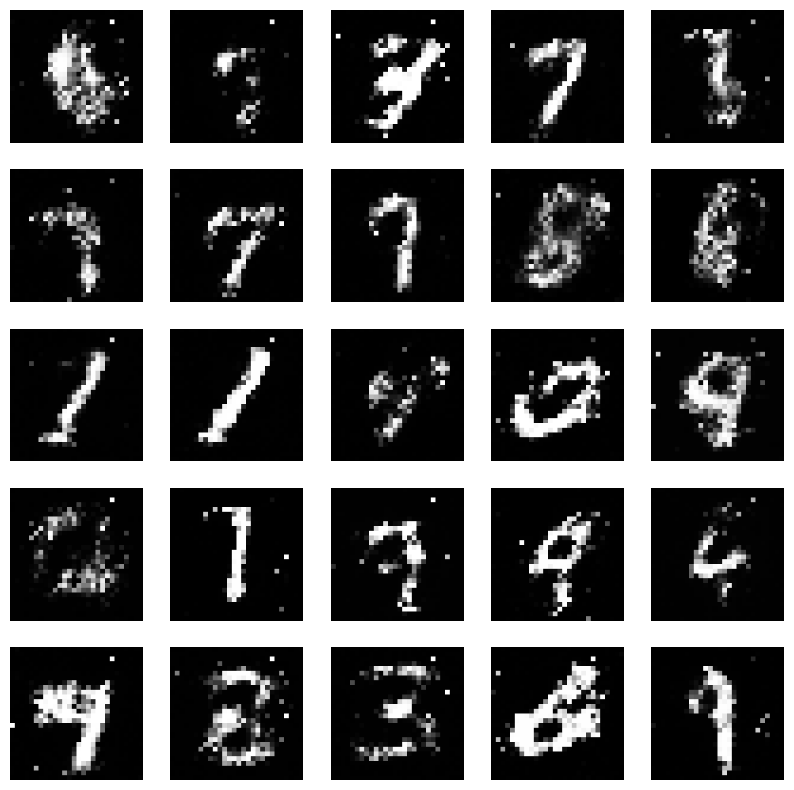

13


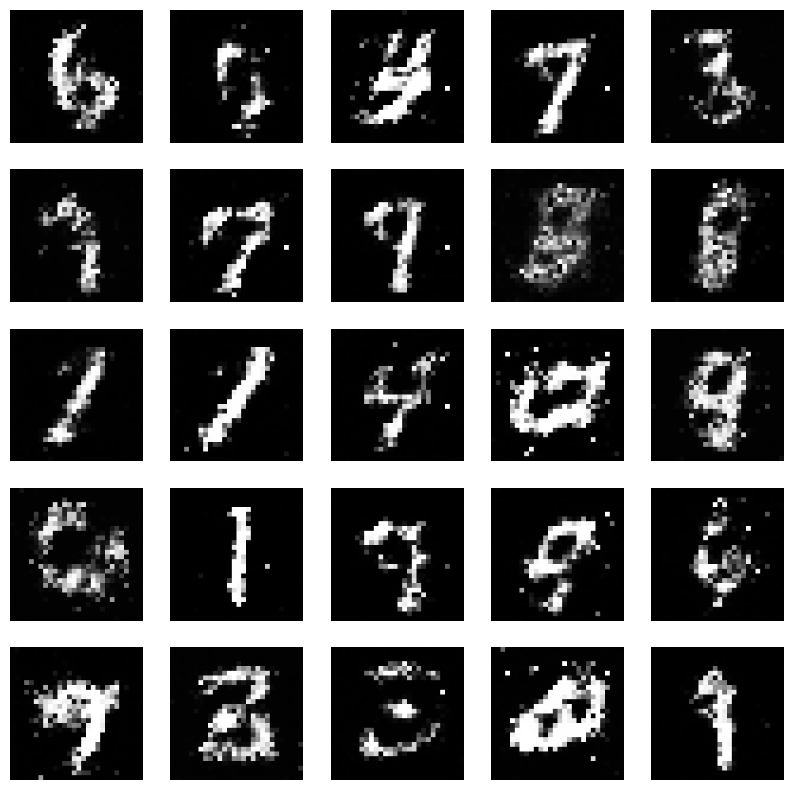

14


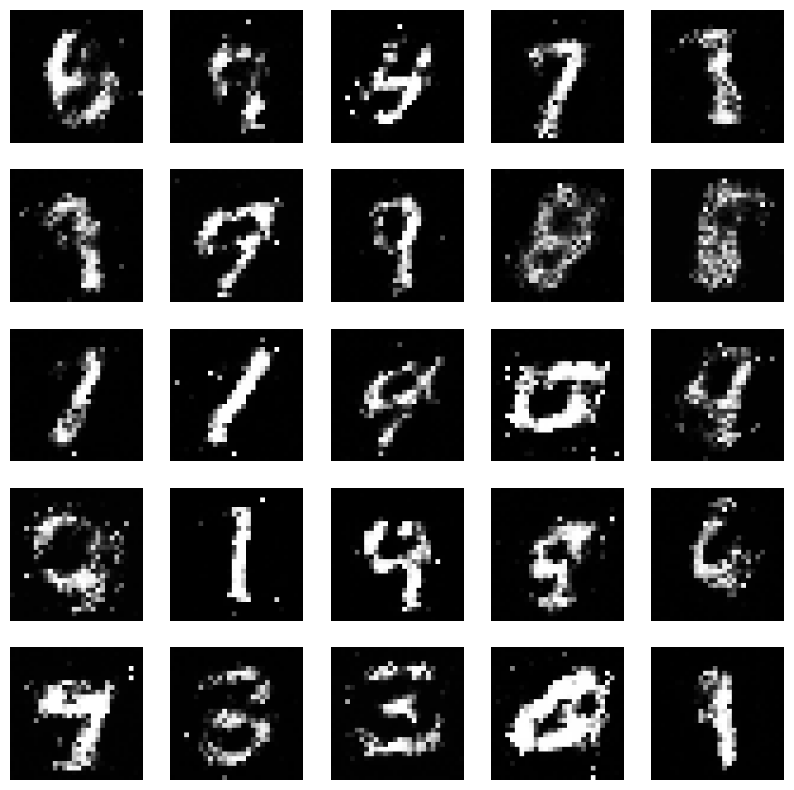

15


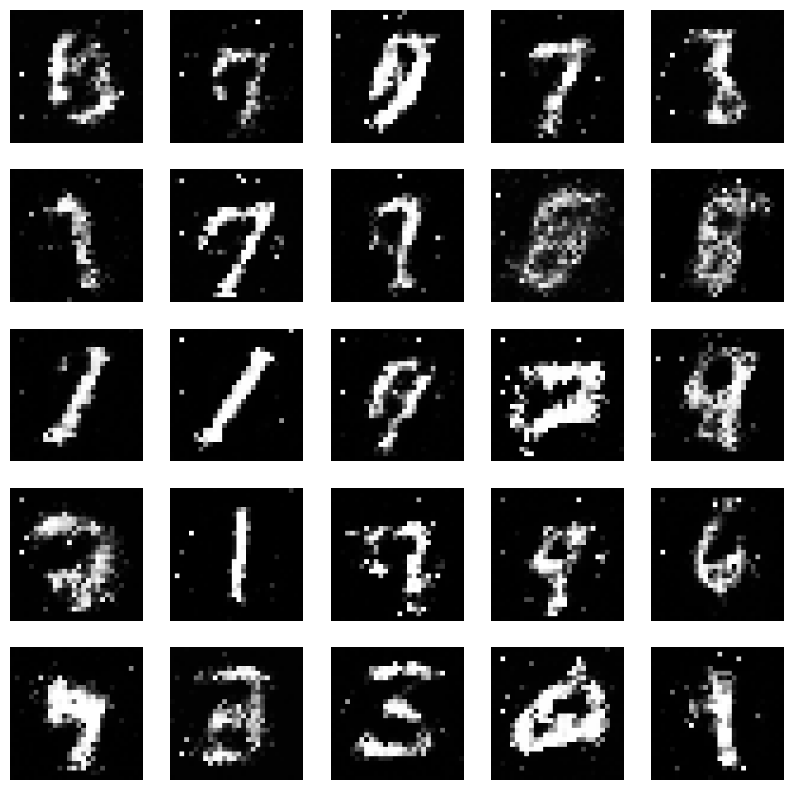

16


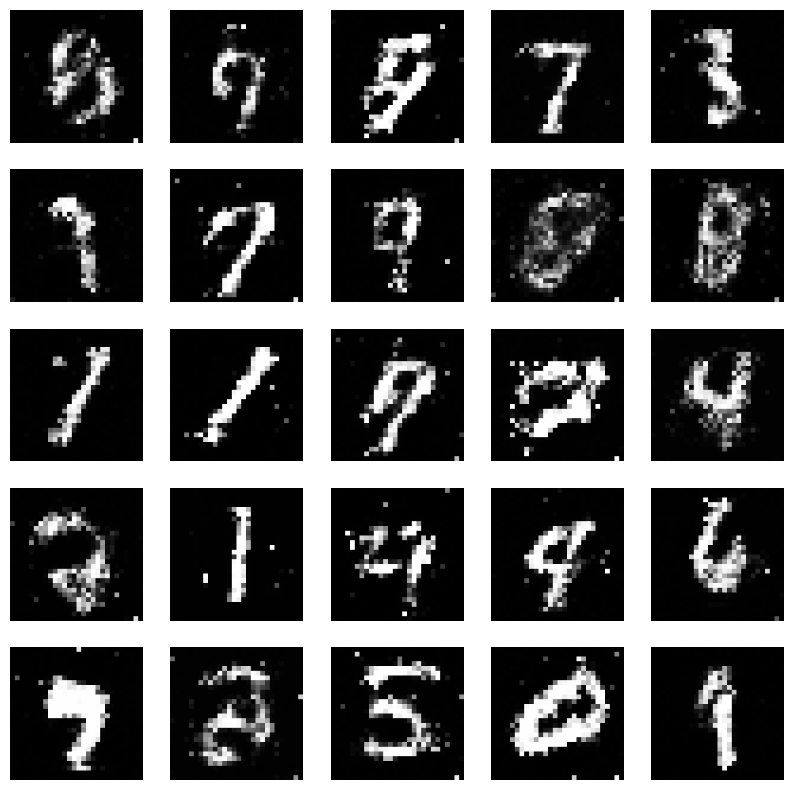

17


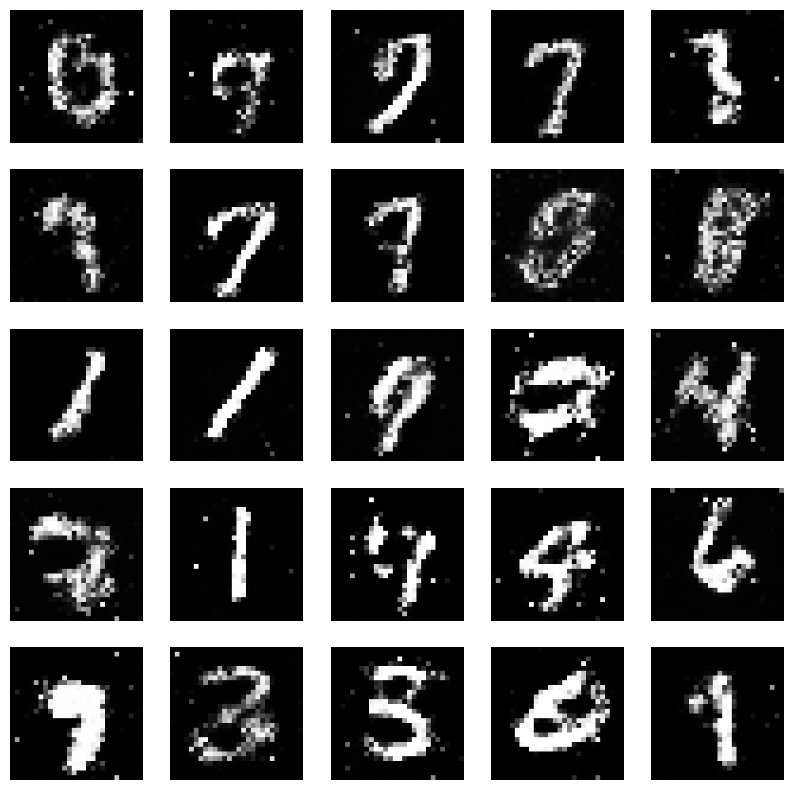

18


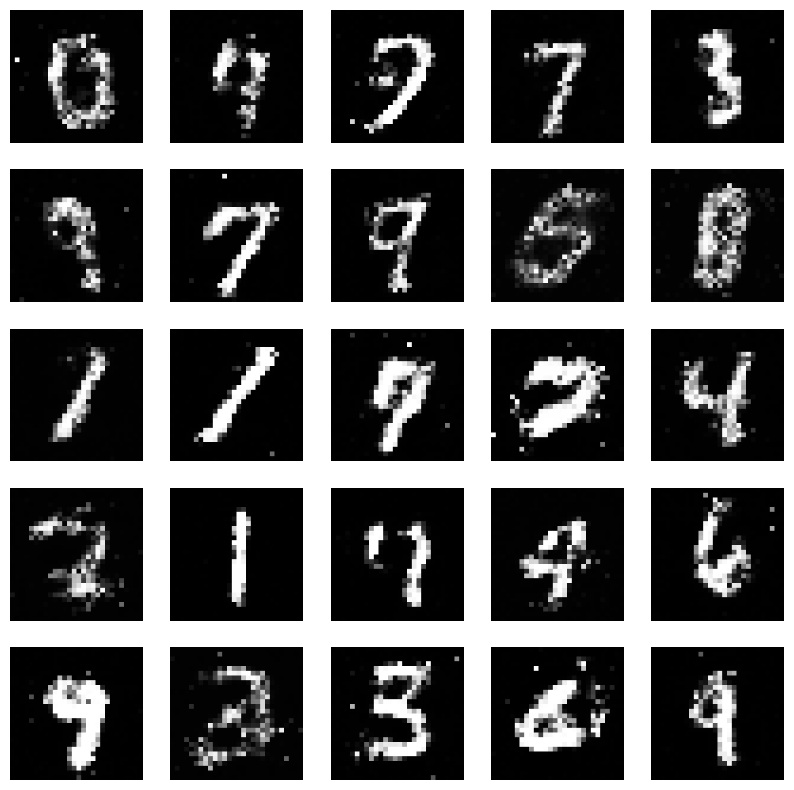

19


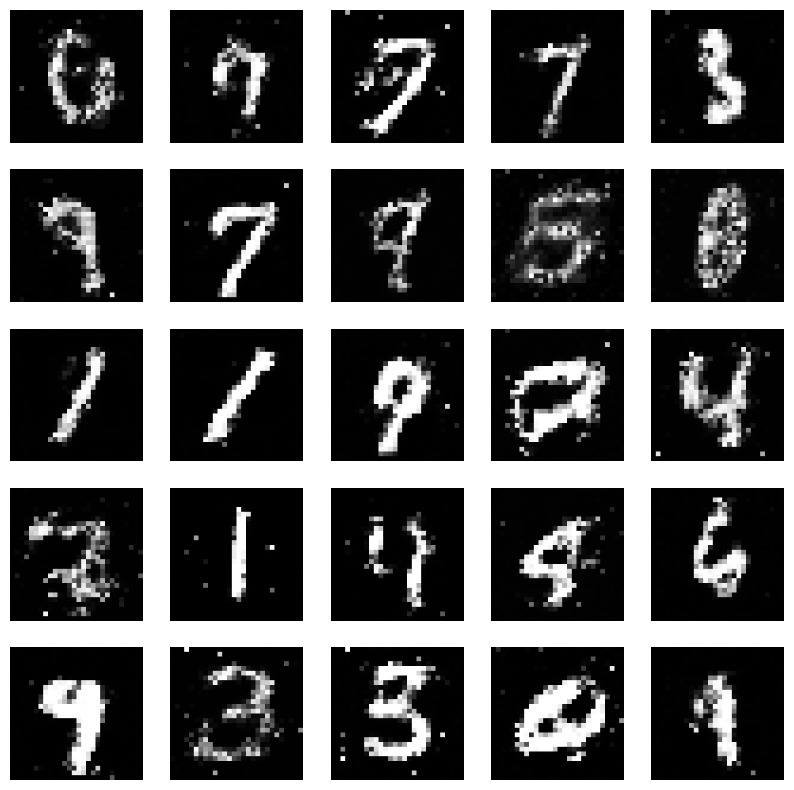

20


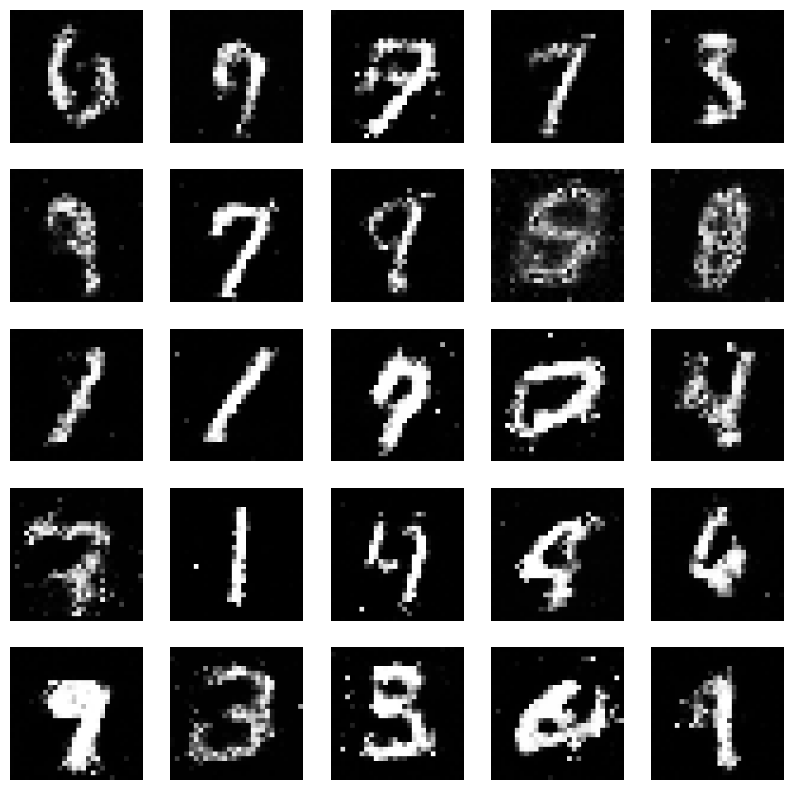

21


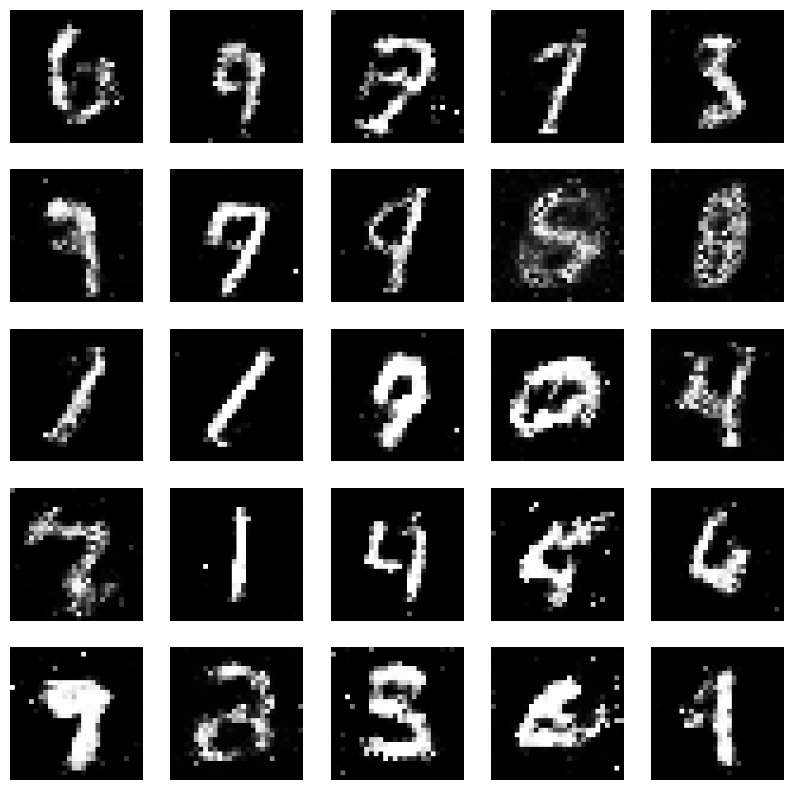

22


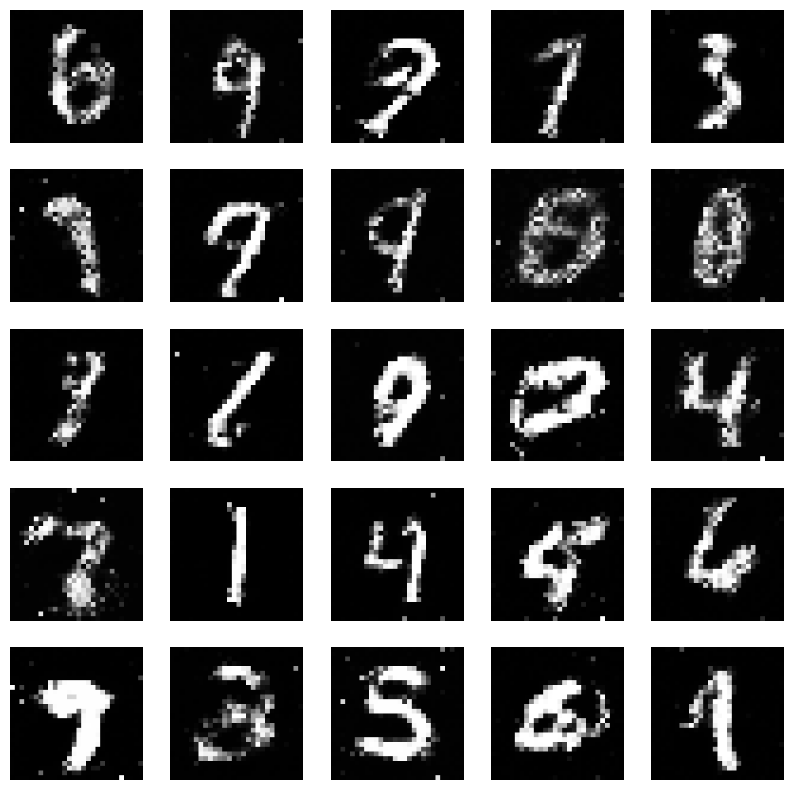

23


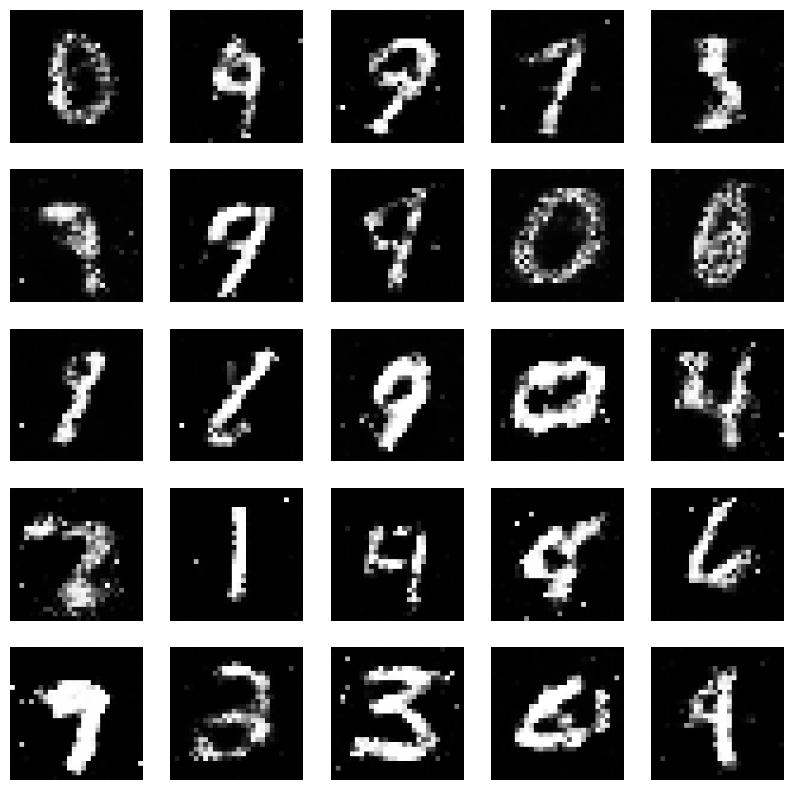

24


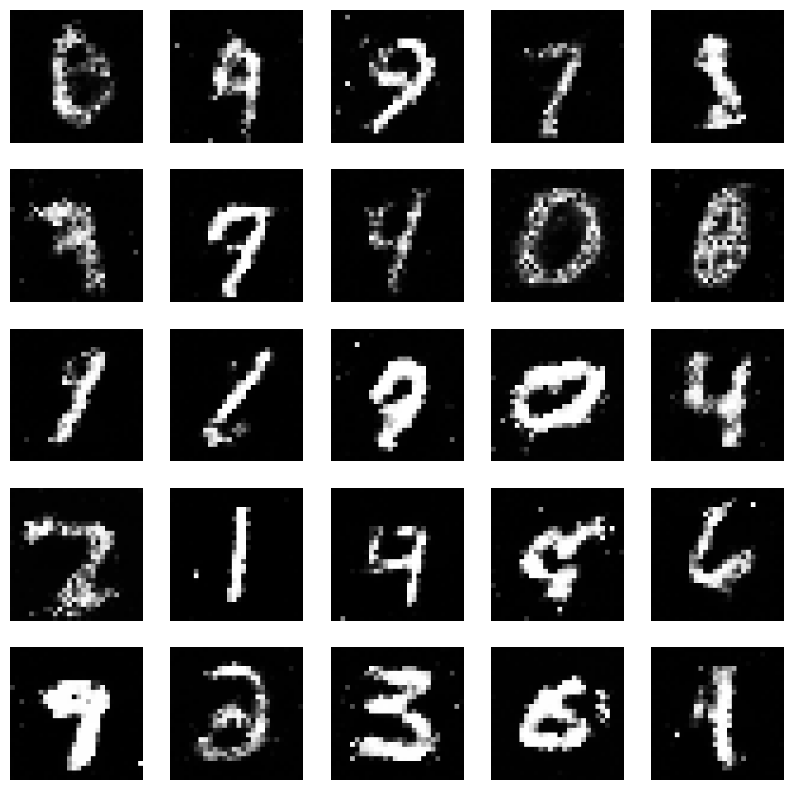

25


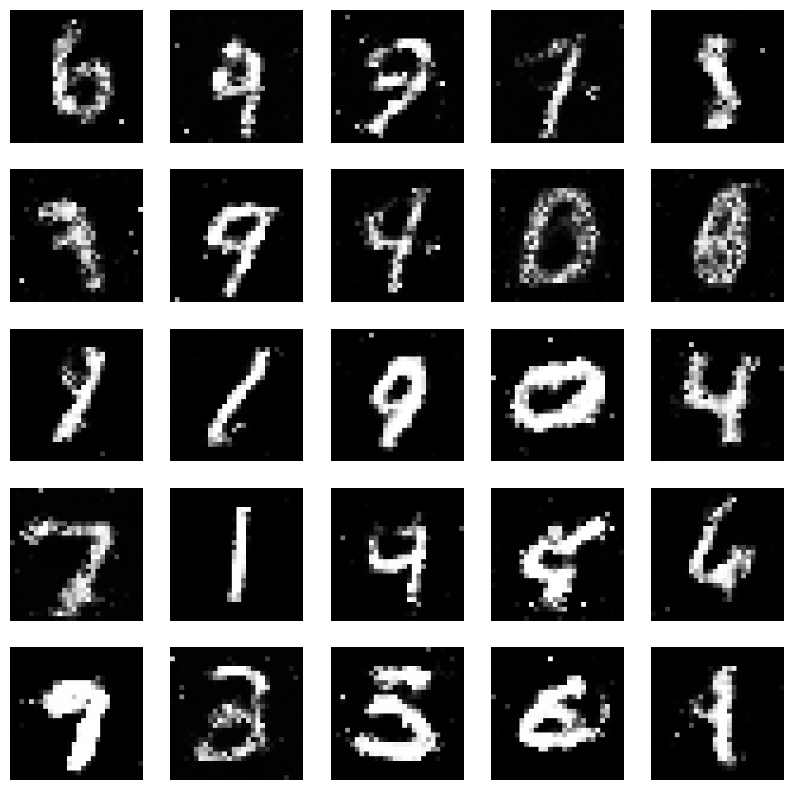

26


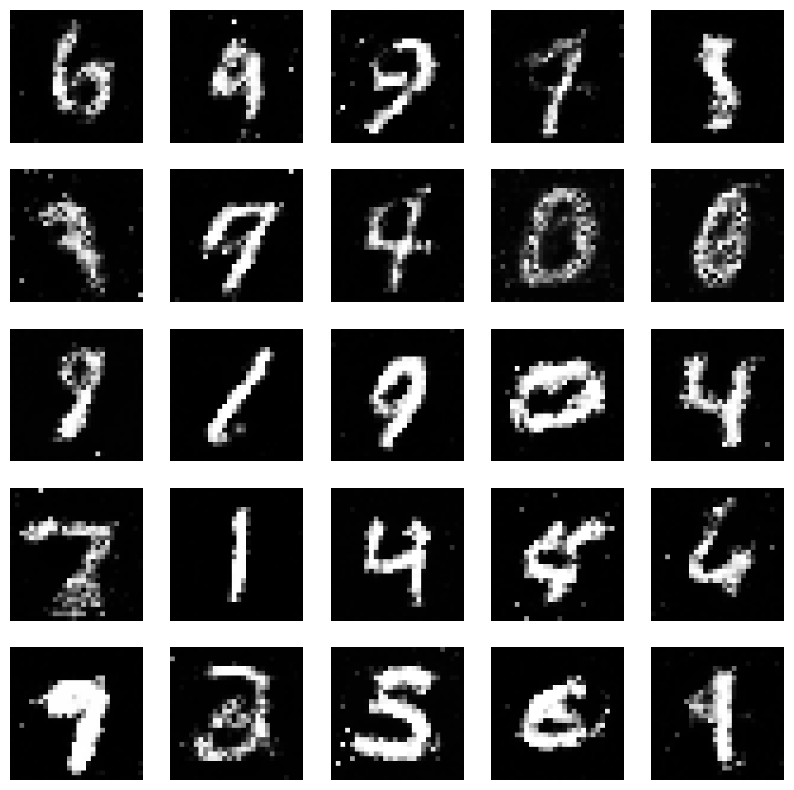

27


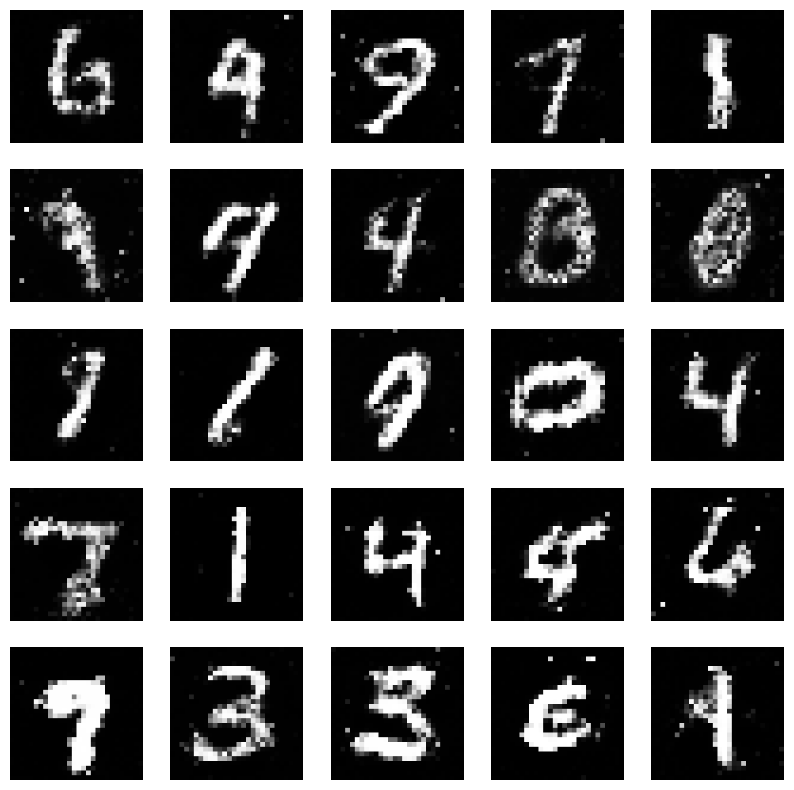

28


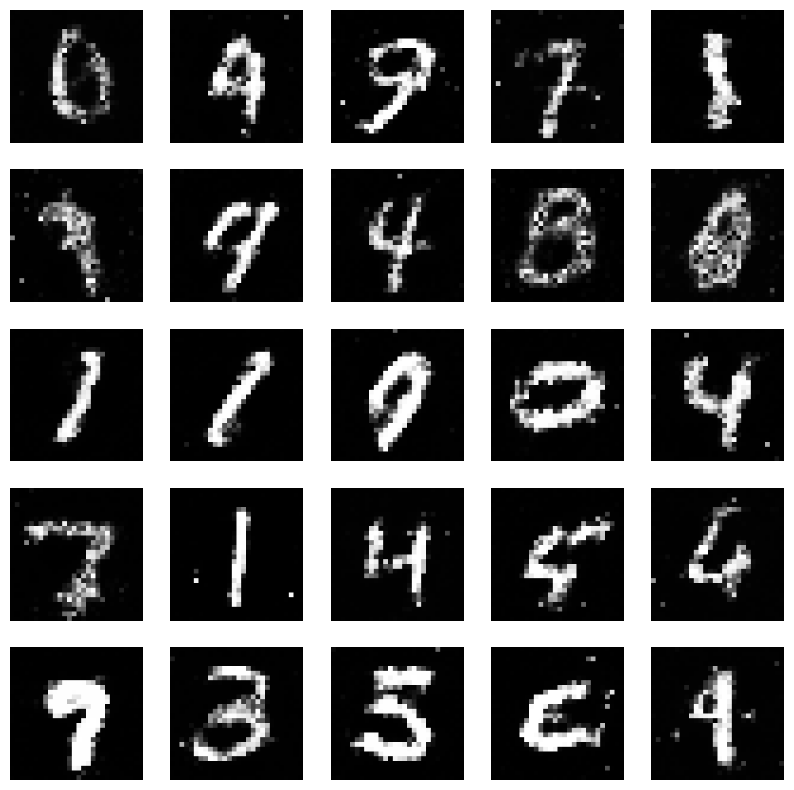

29


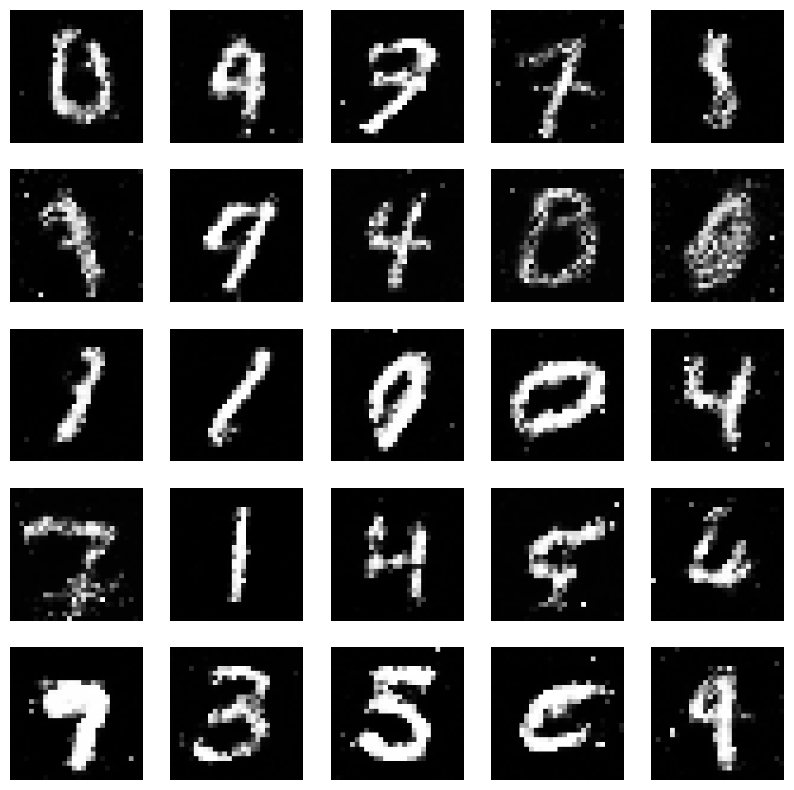

30


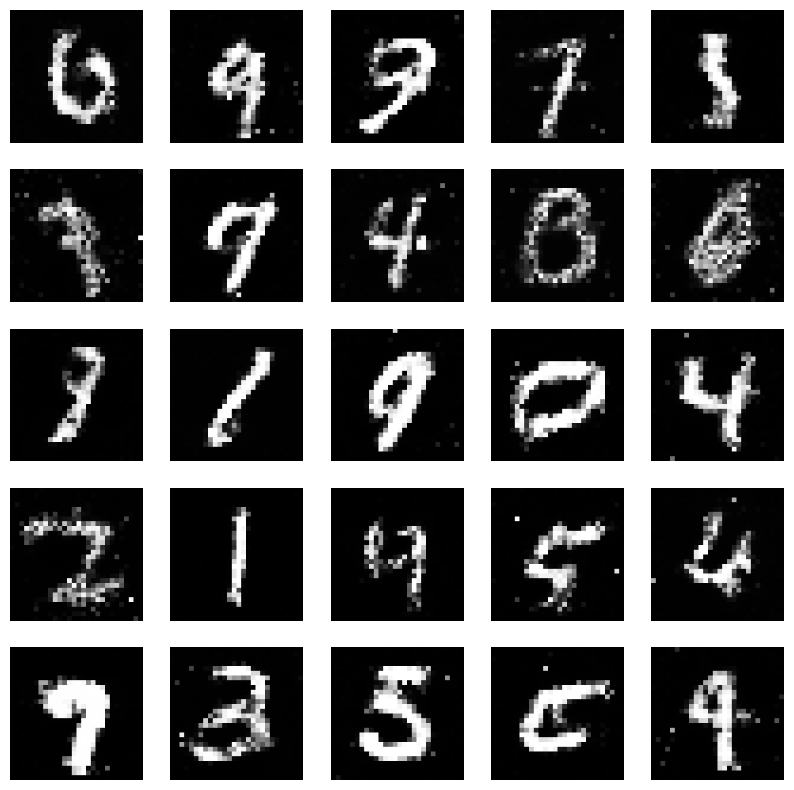

31


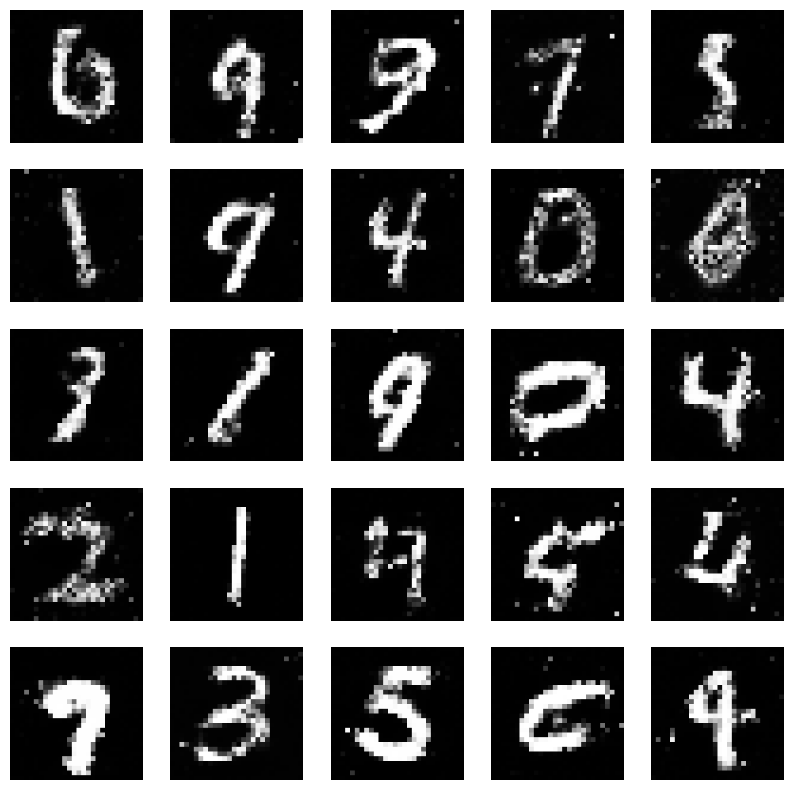

32


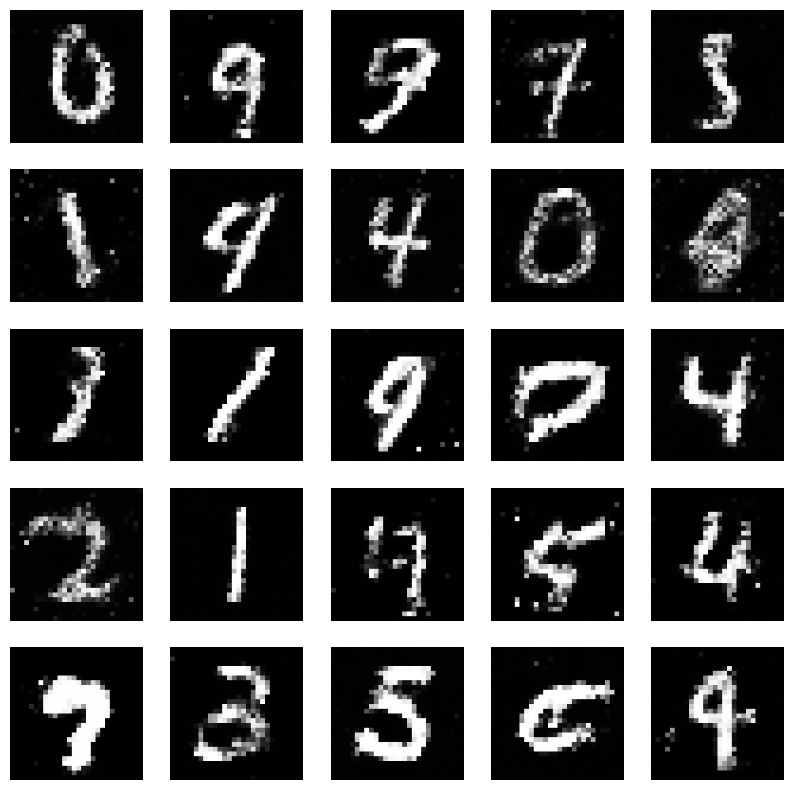

33


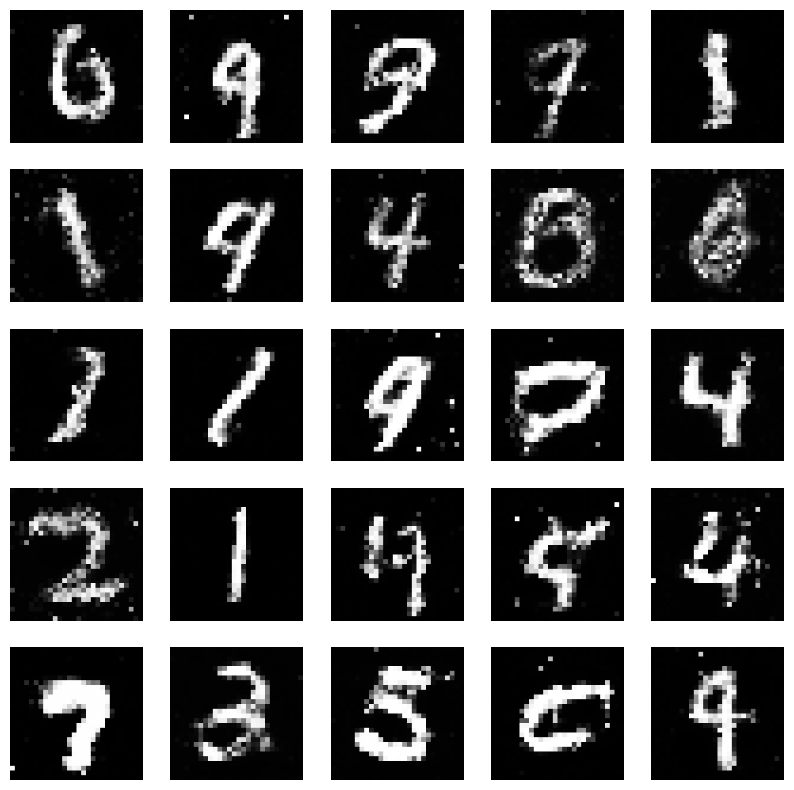

34


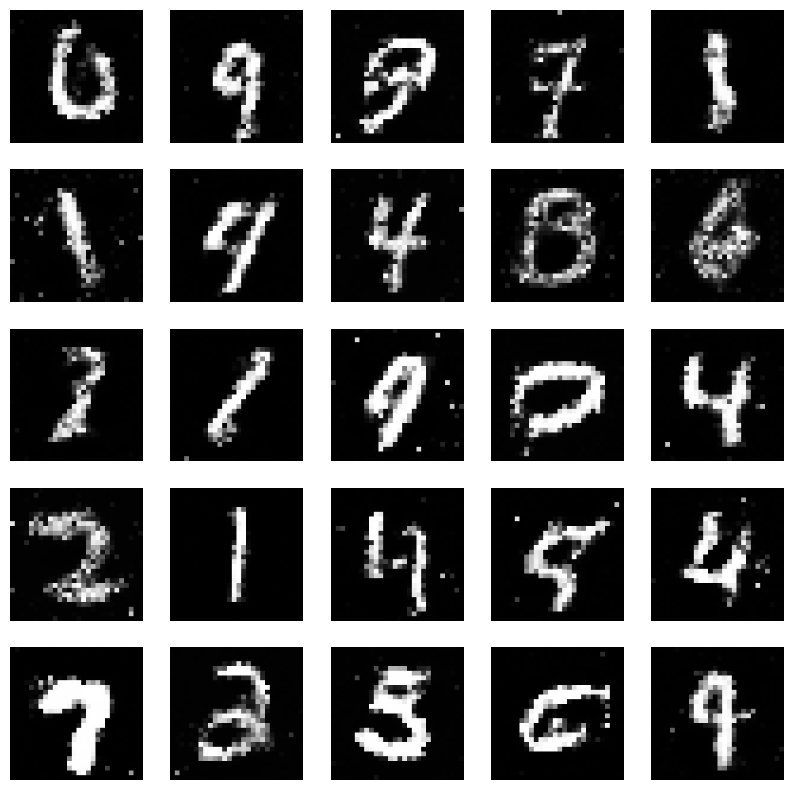

35


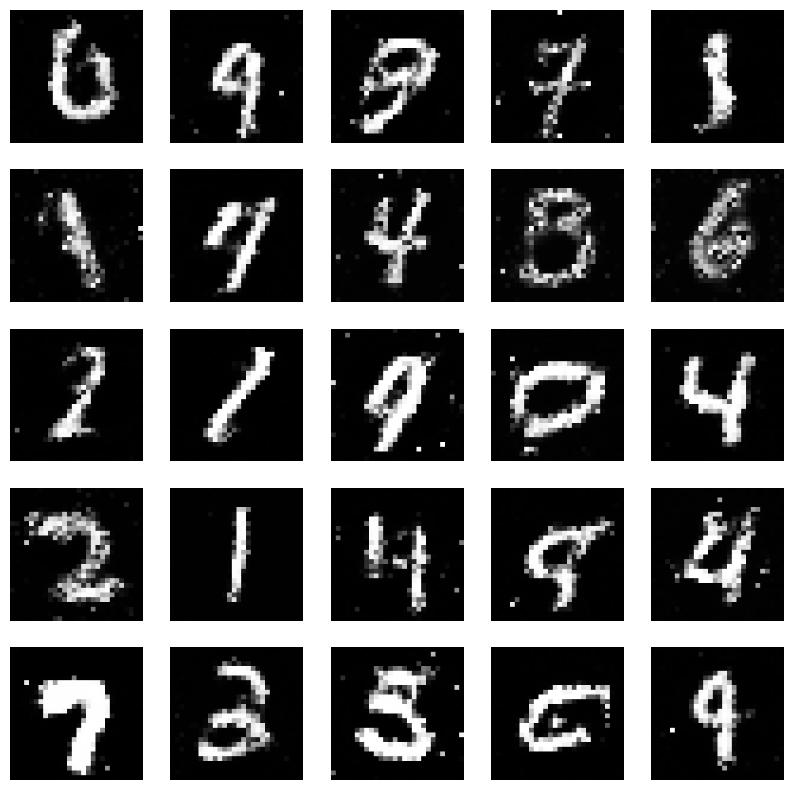

36


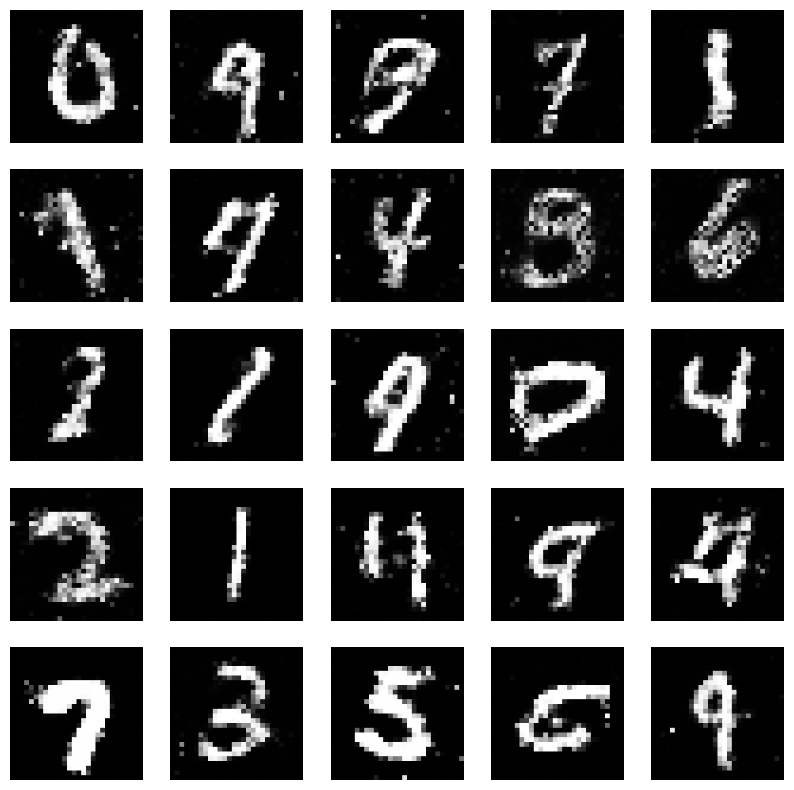

37


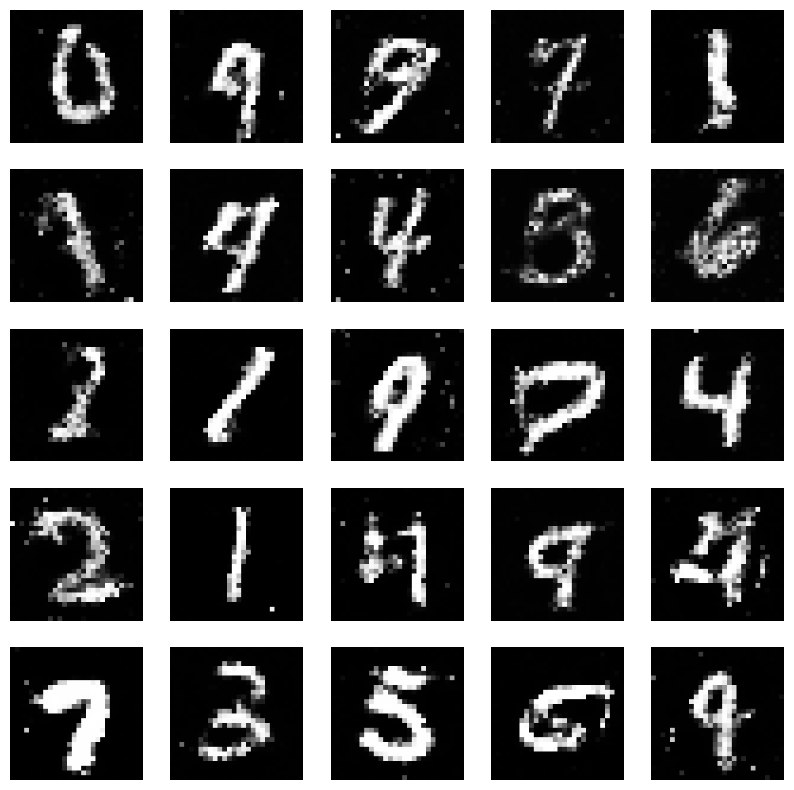

38


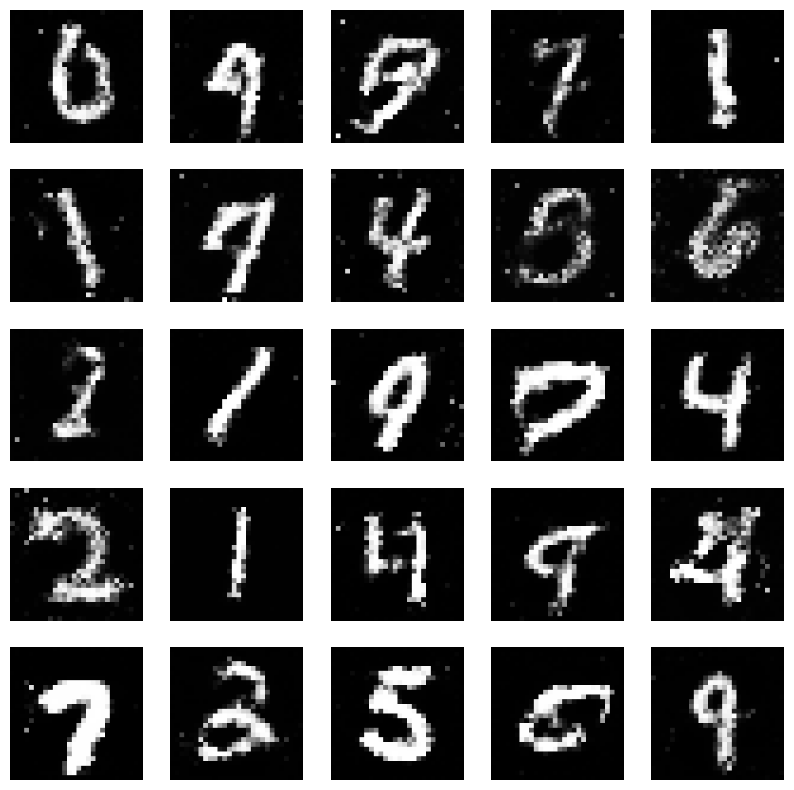

39


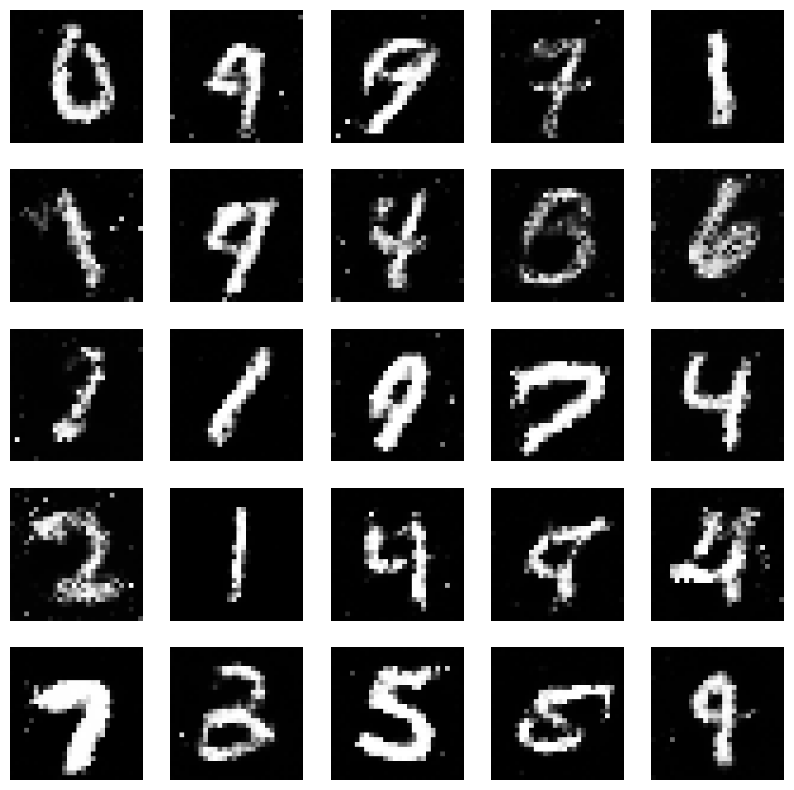

40


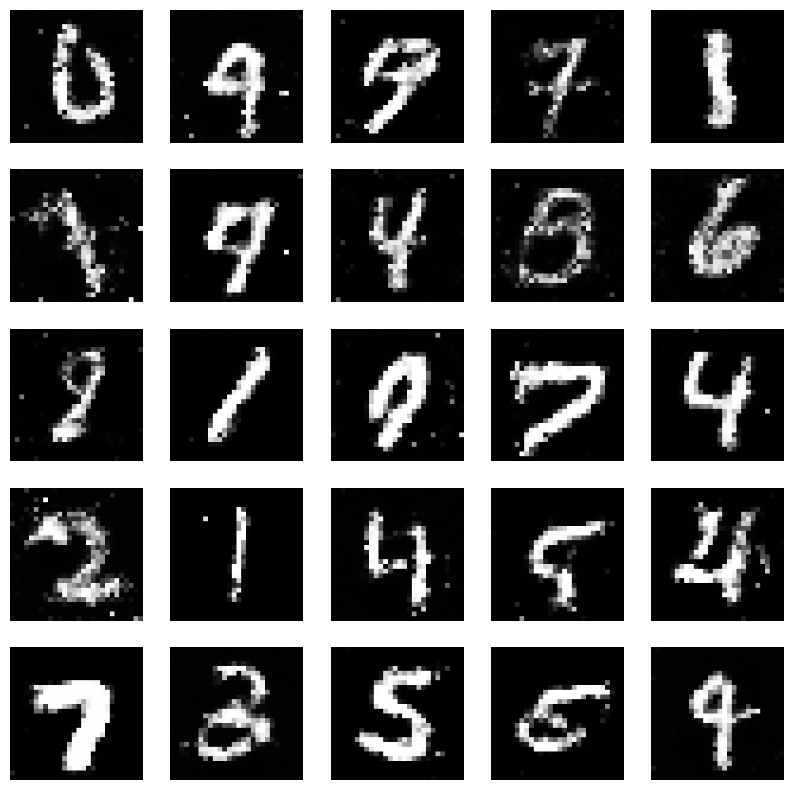

41


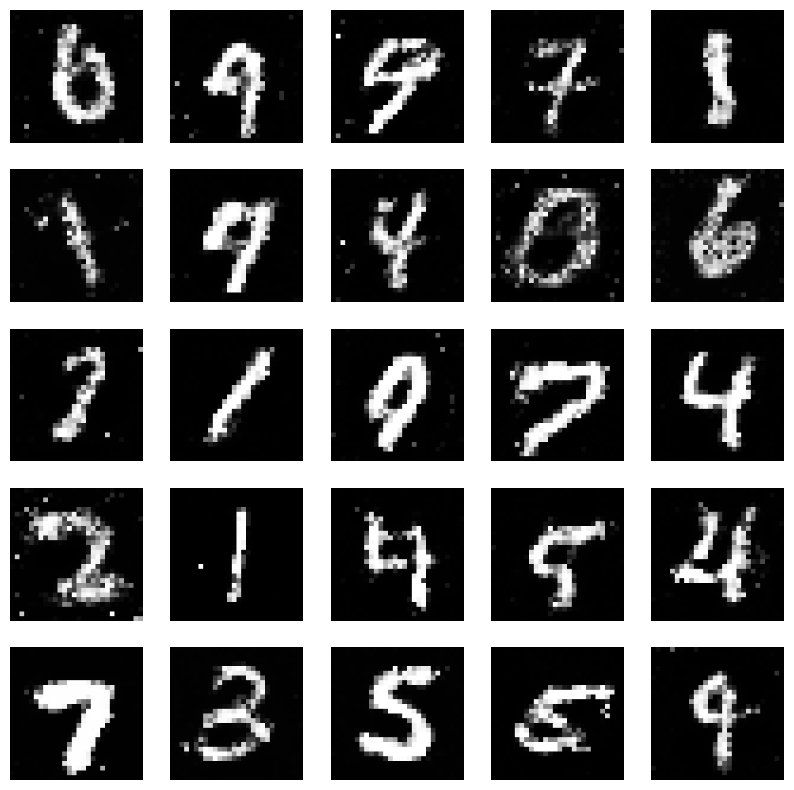

42


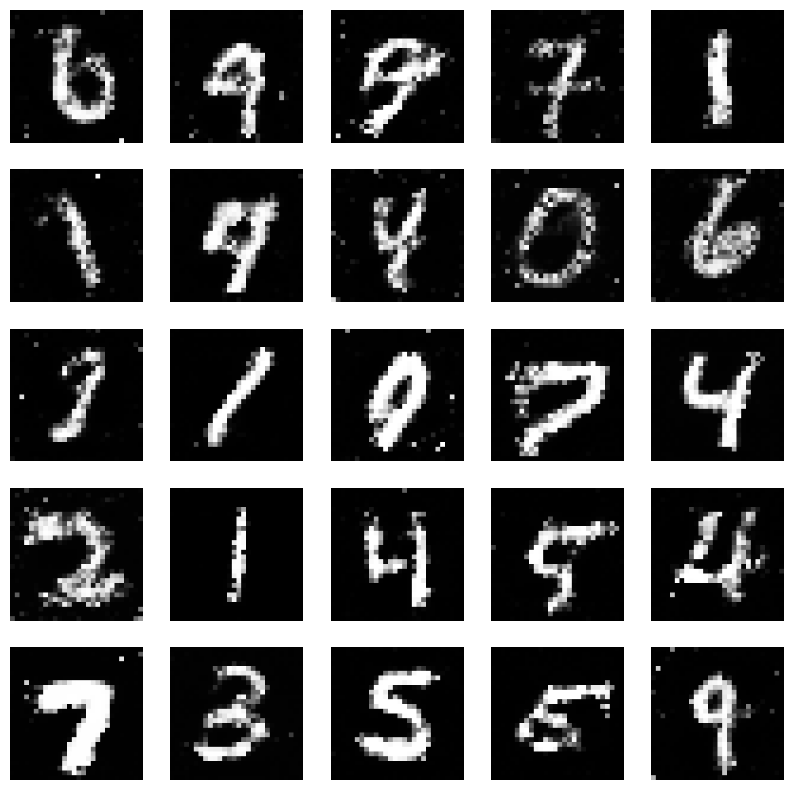

43


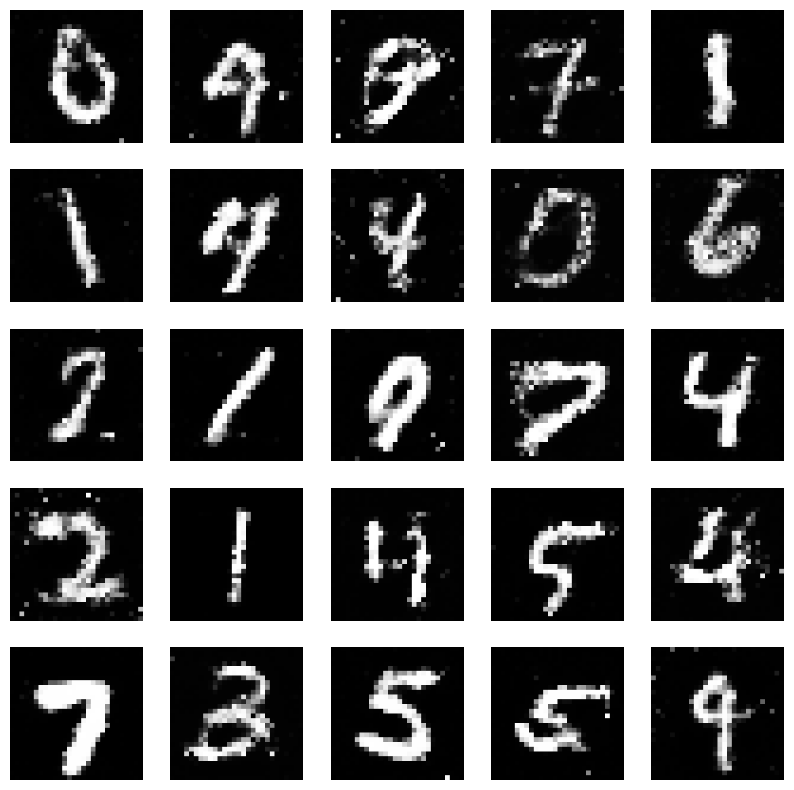

44


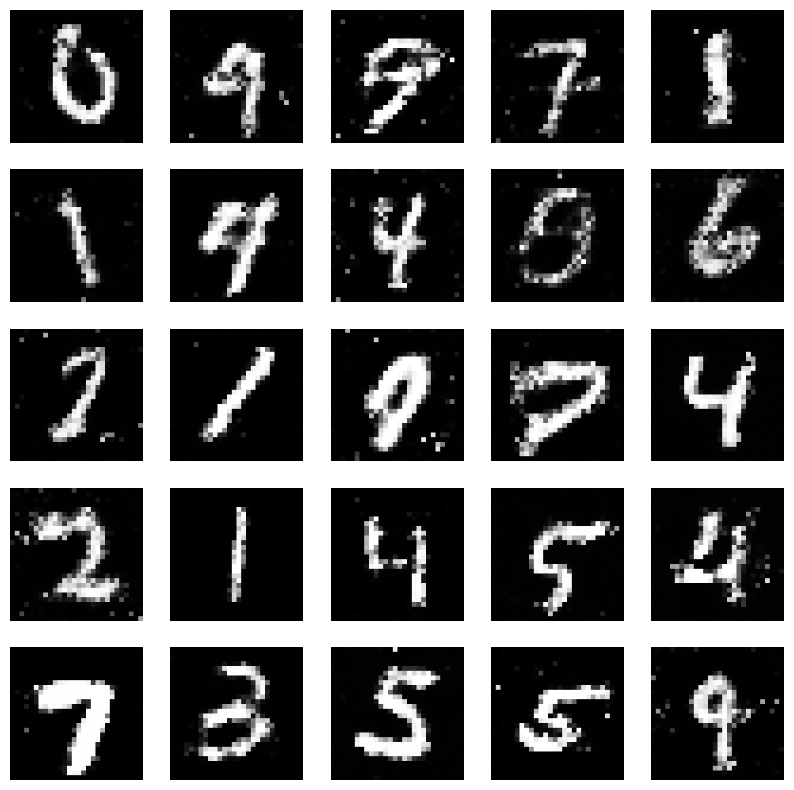

45


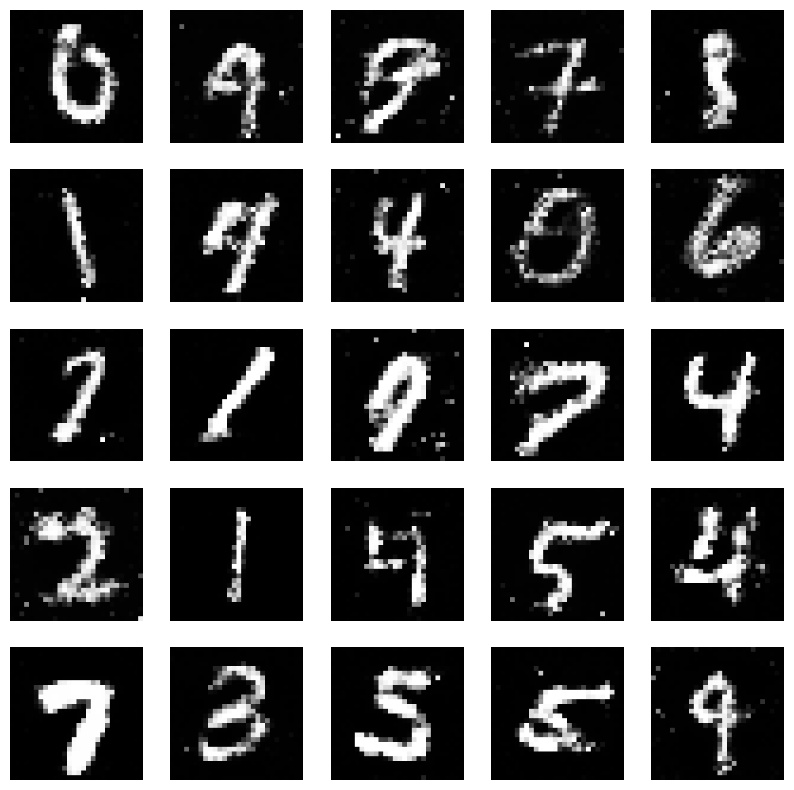

46


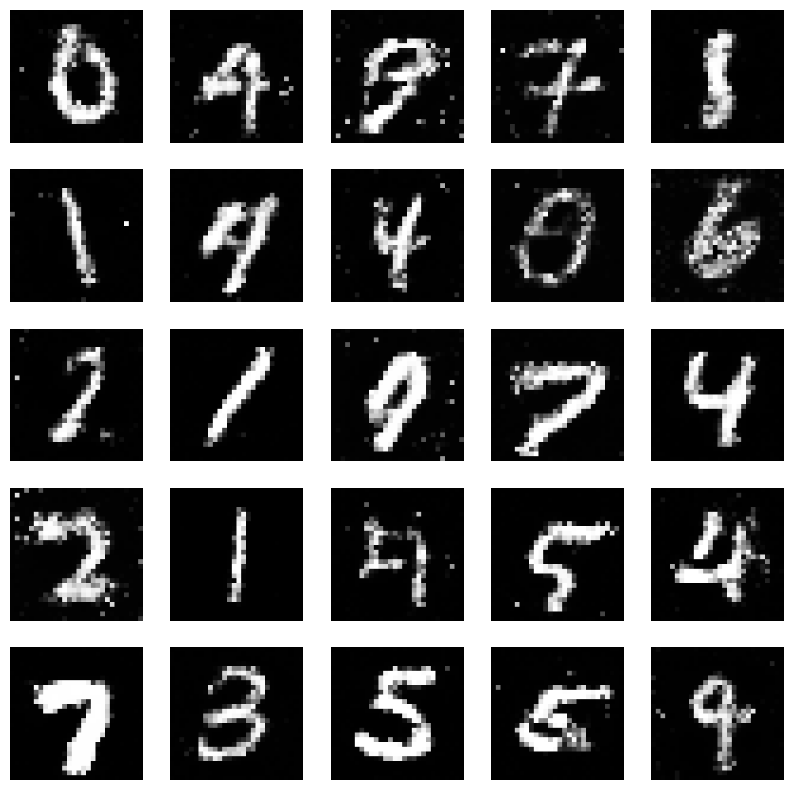

47


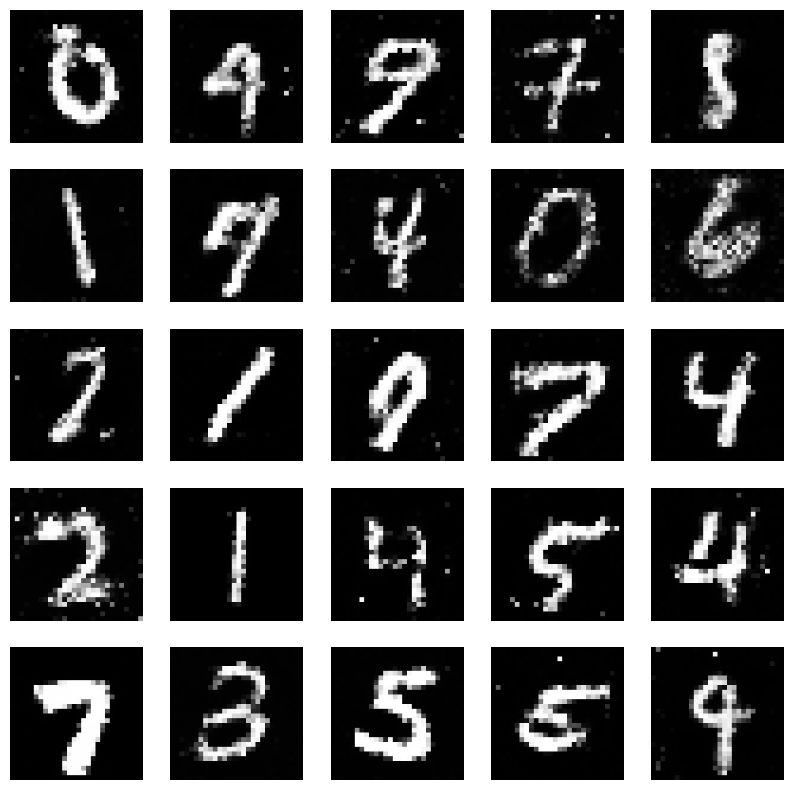

48


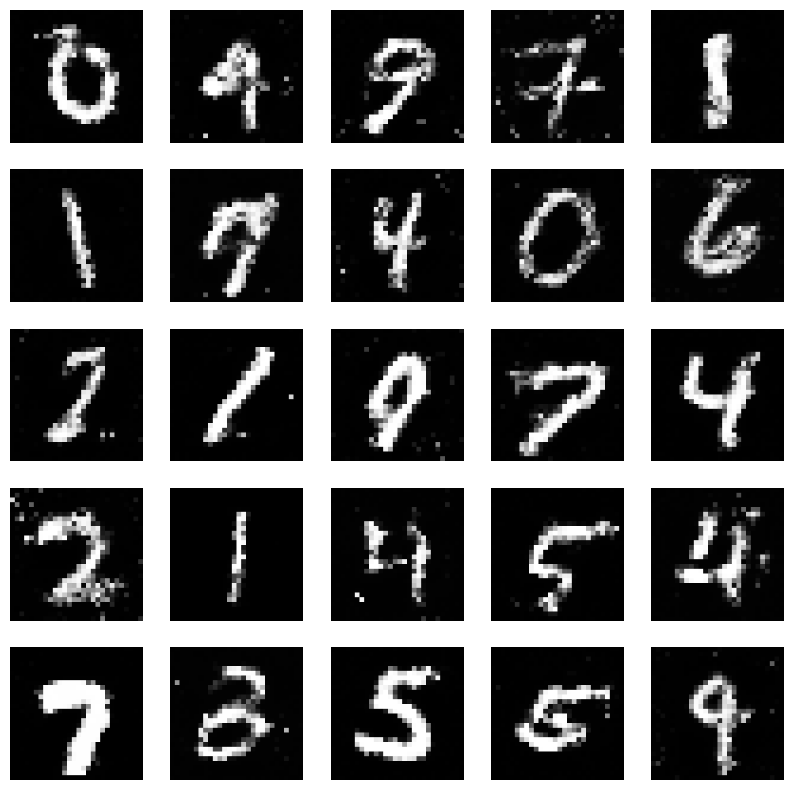

49


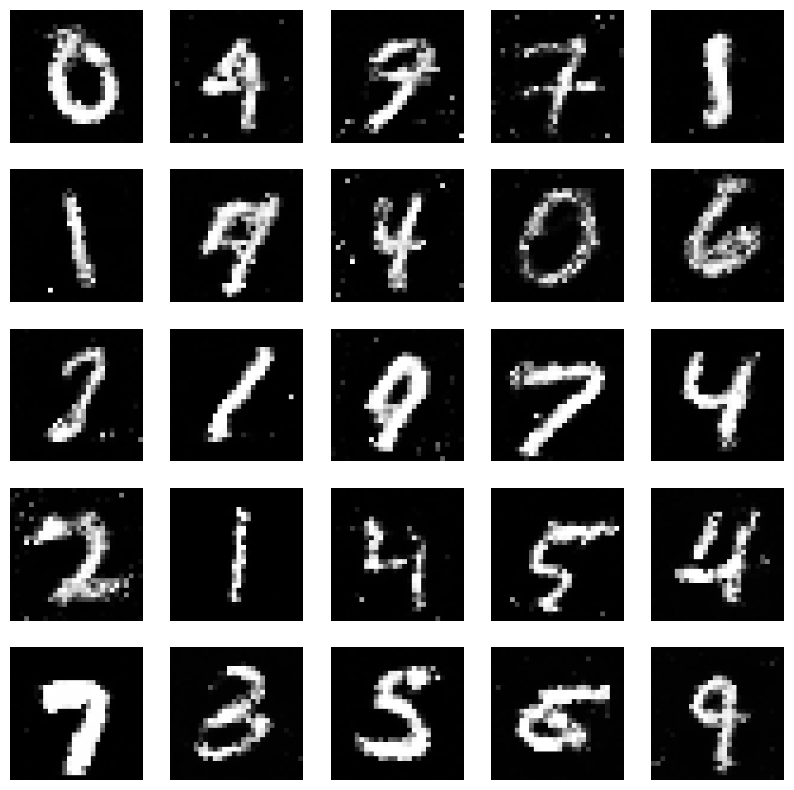

50


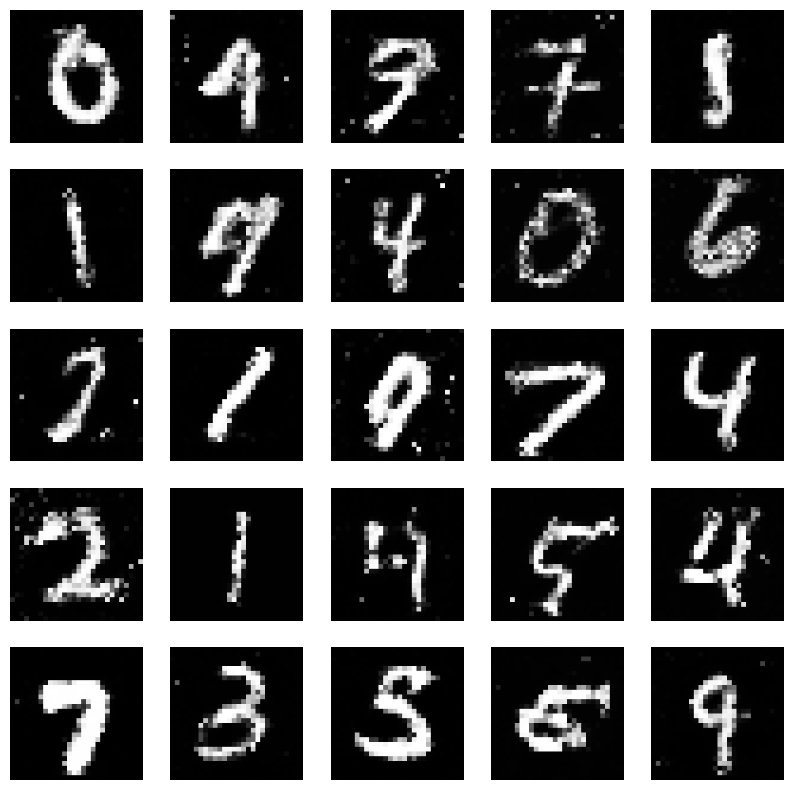

51


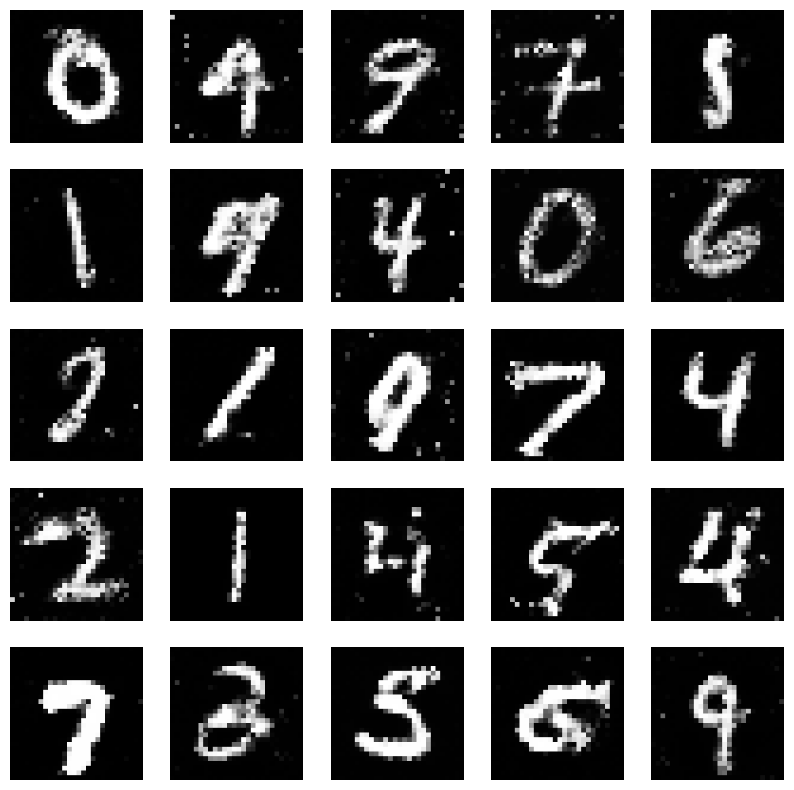

52


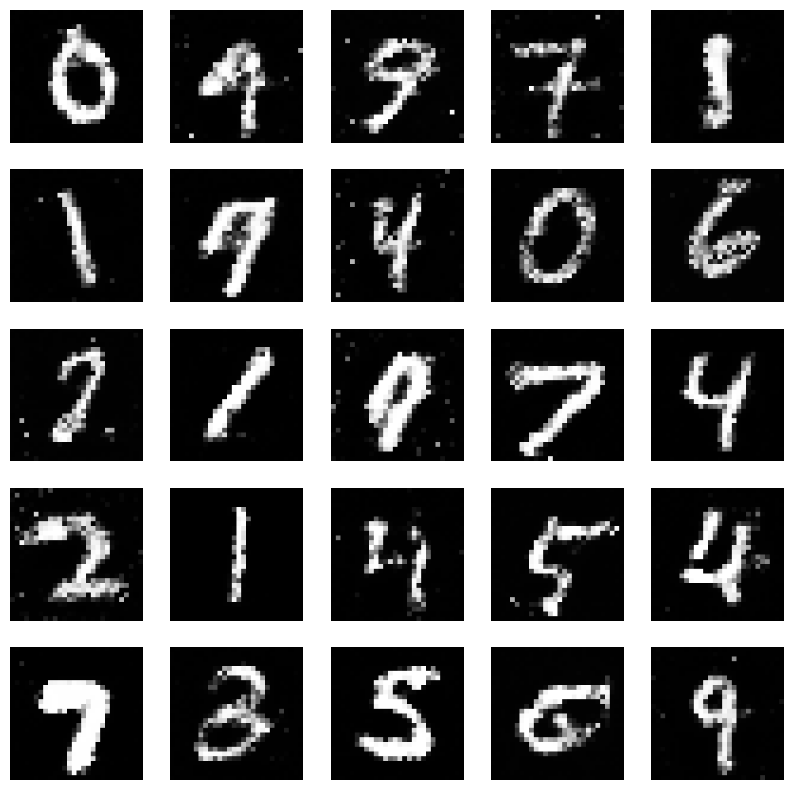

53


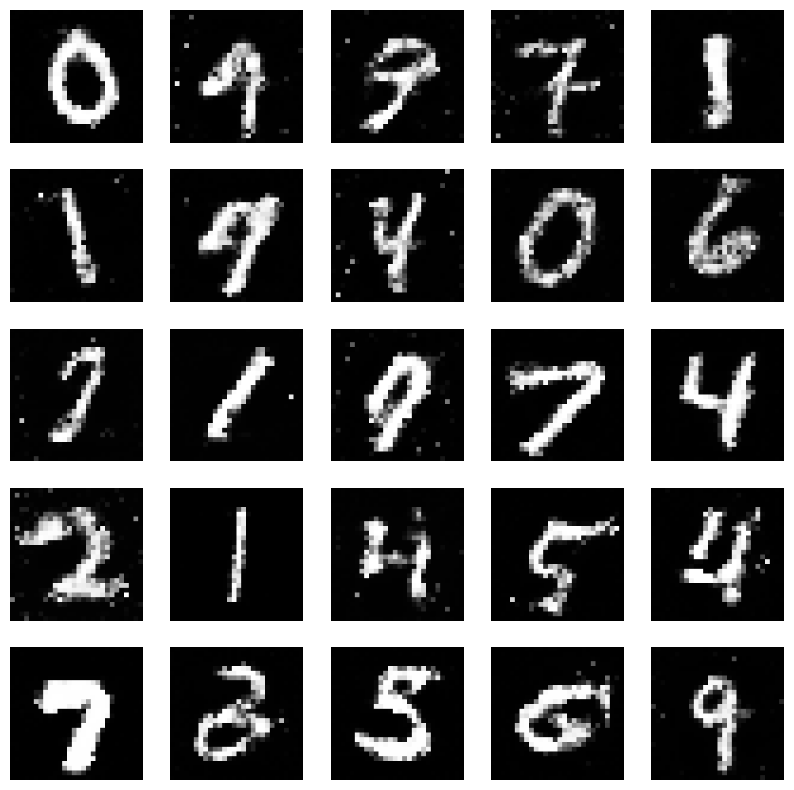

54


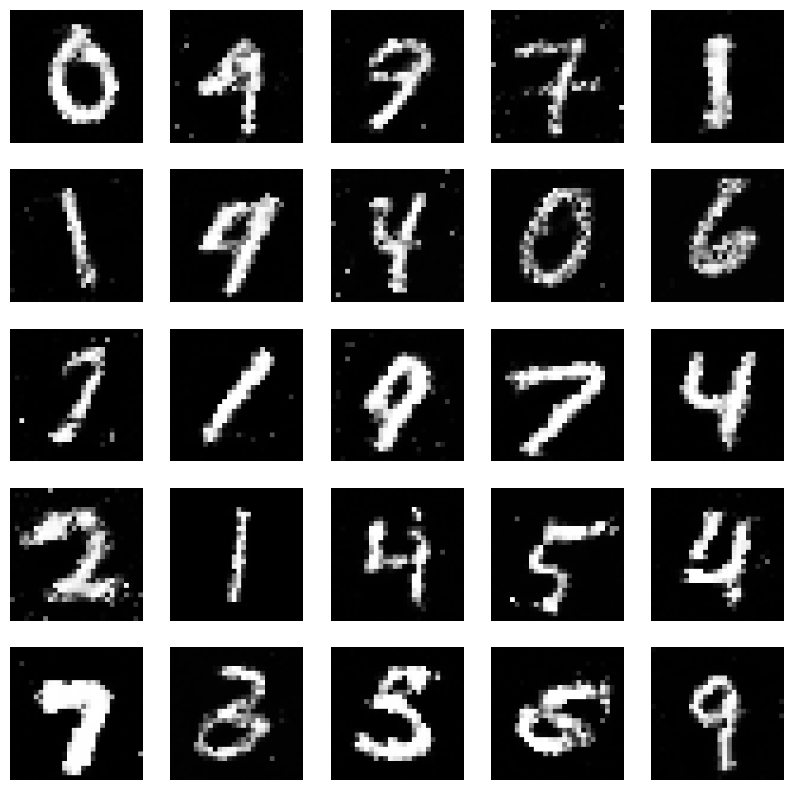

55


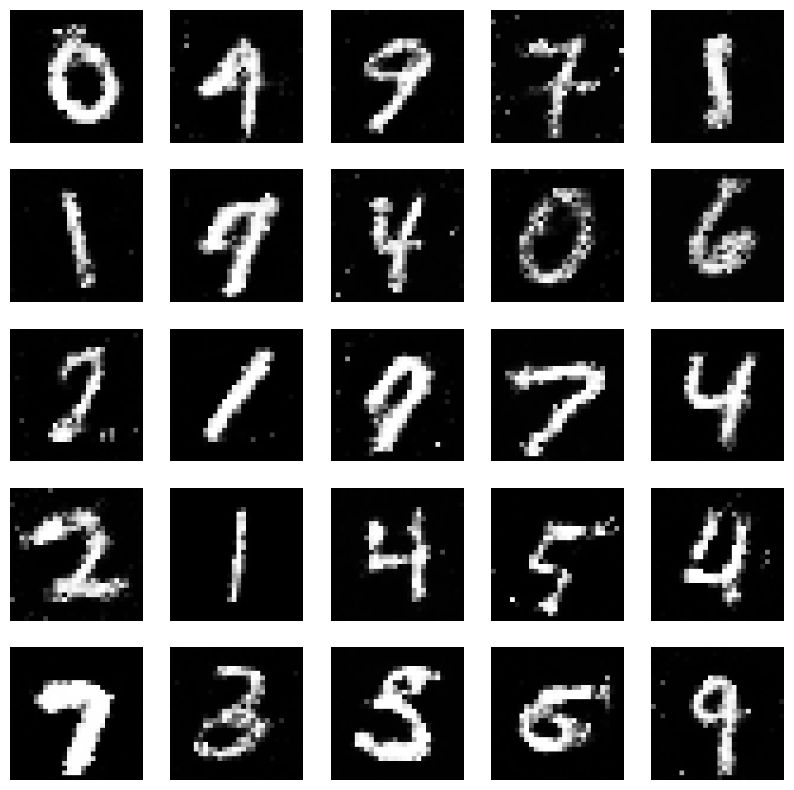

56


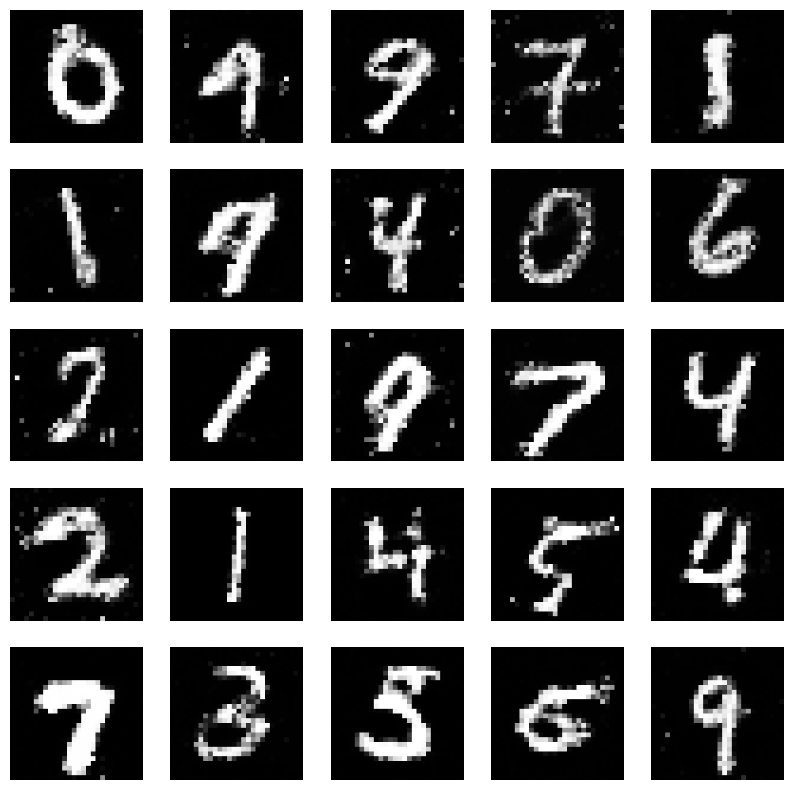

57


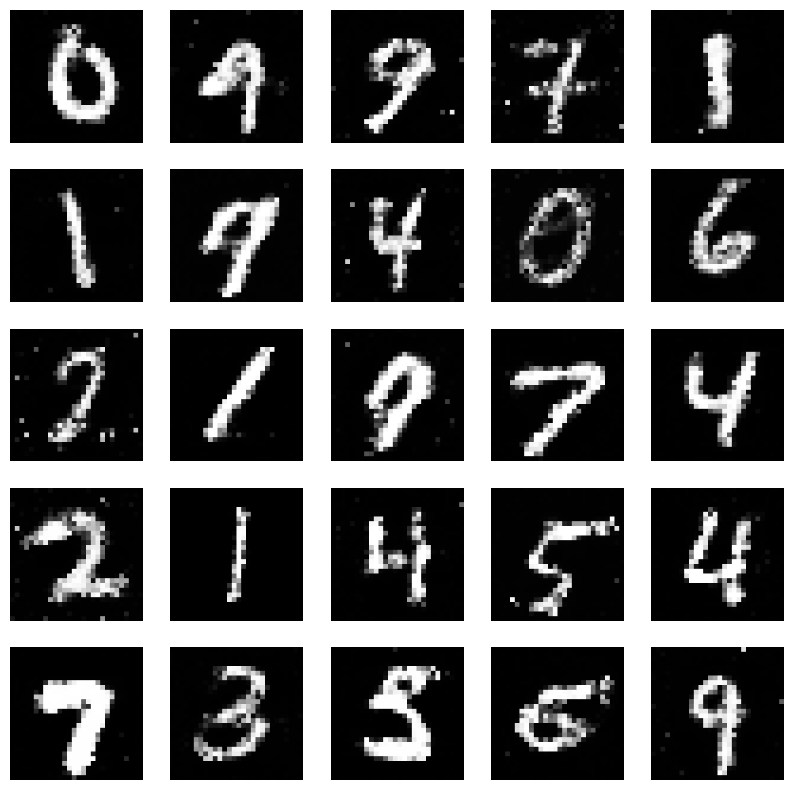

58


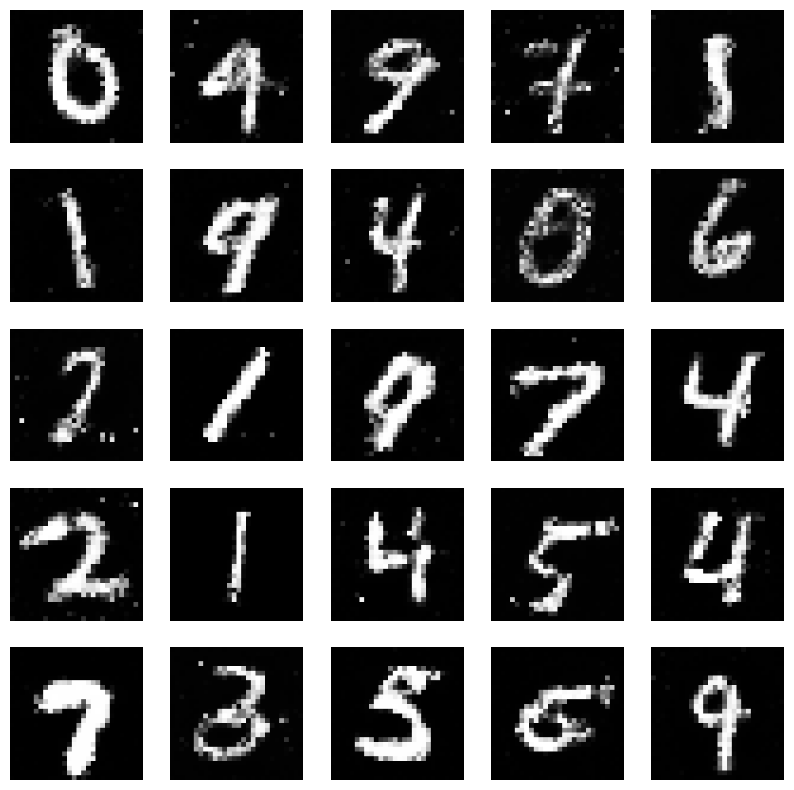

59


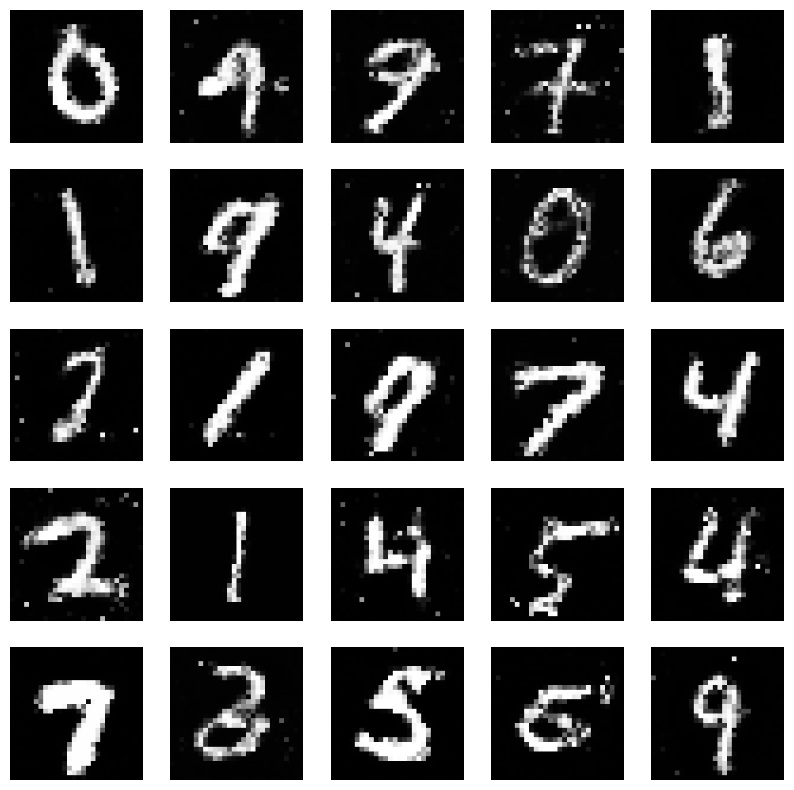

60


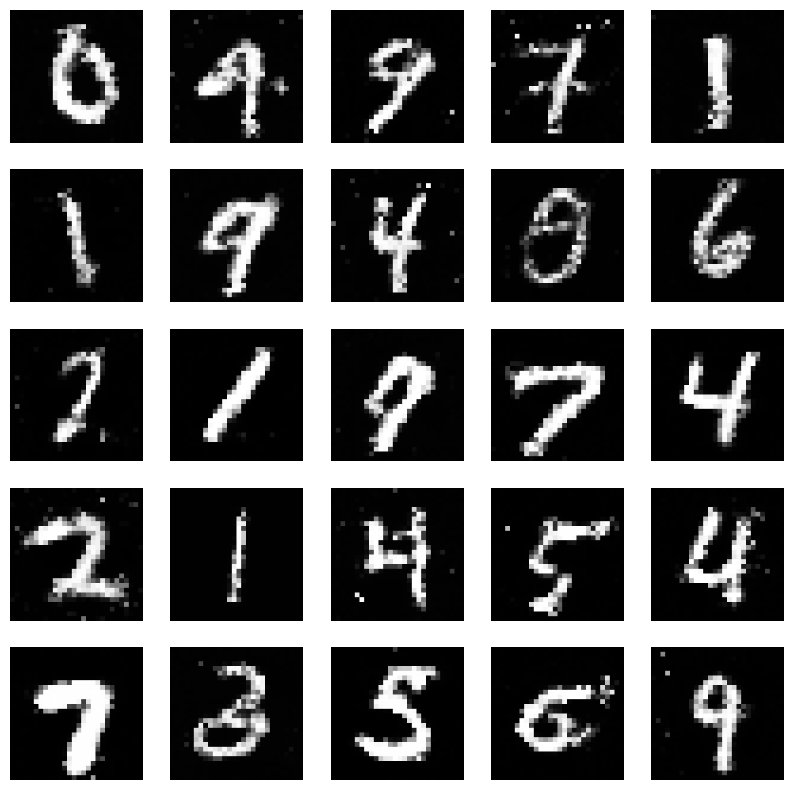

61


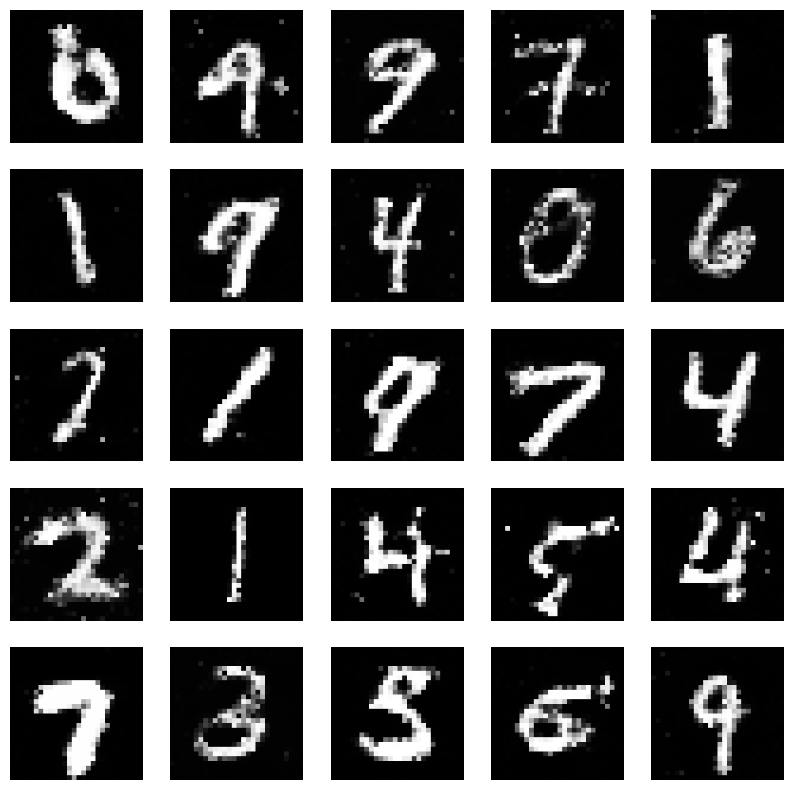

62


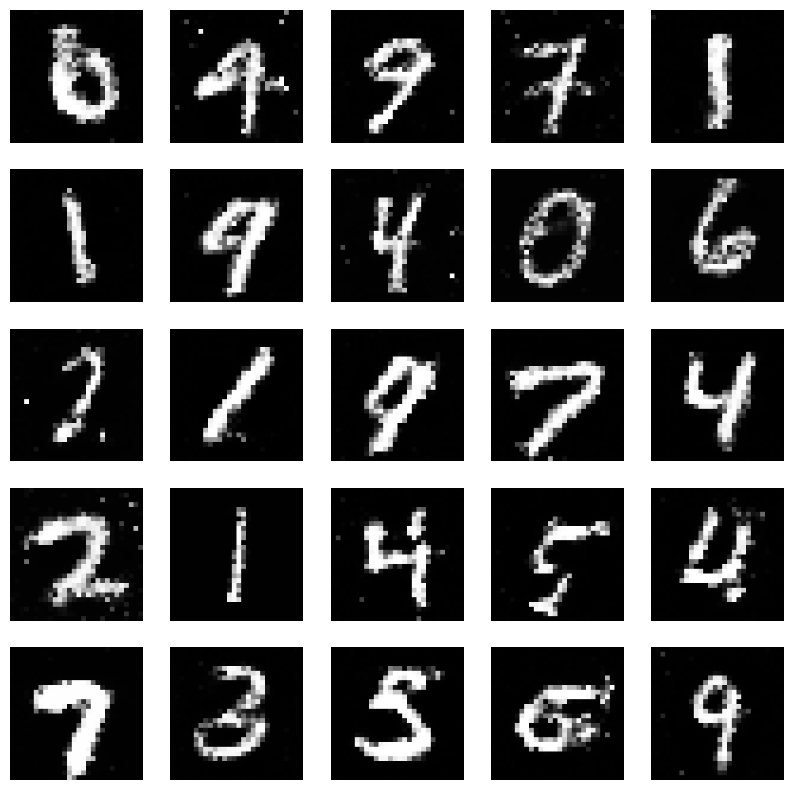

63


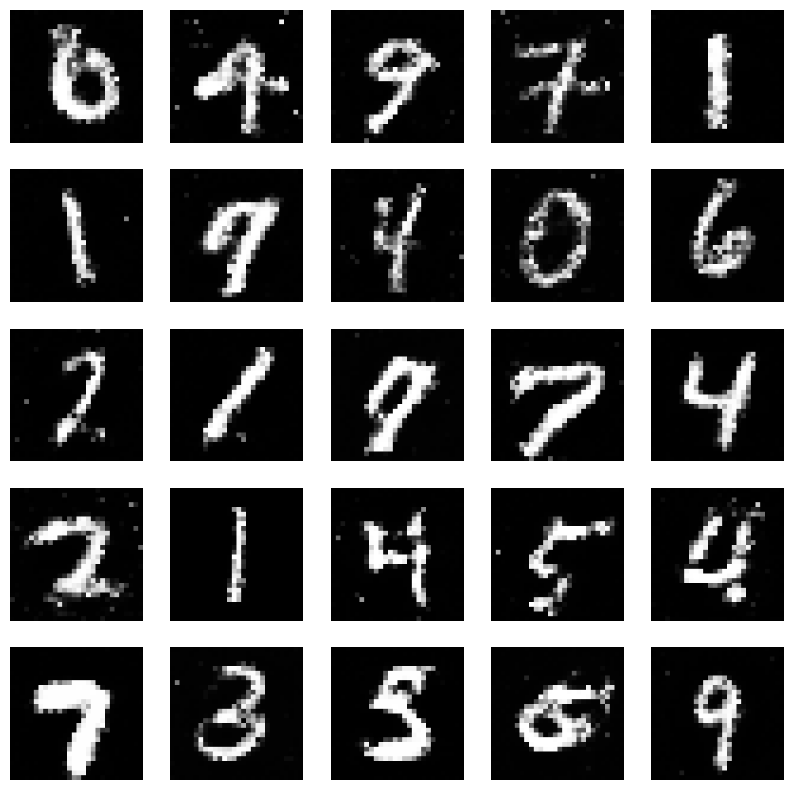

64


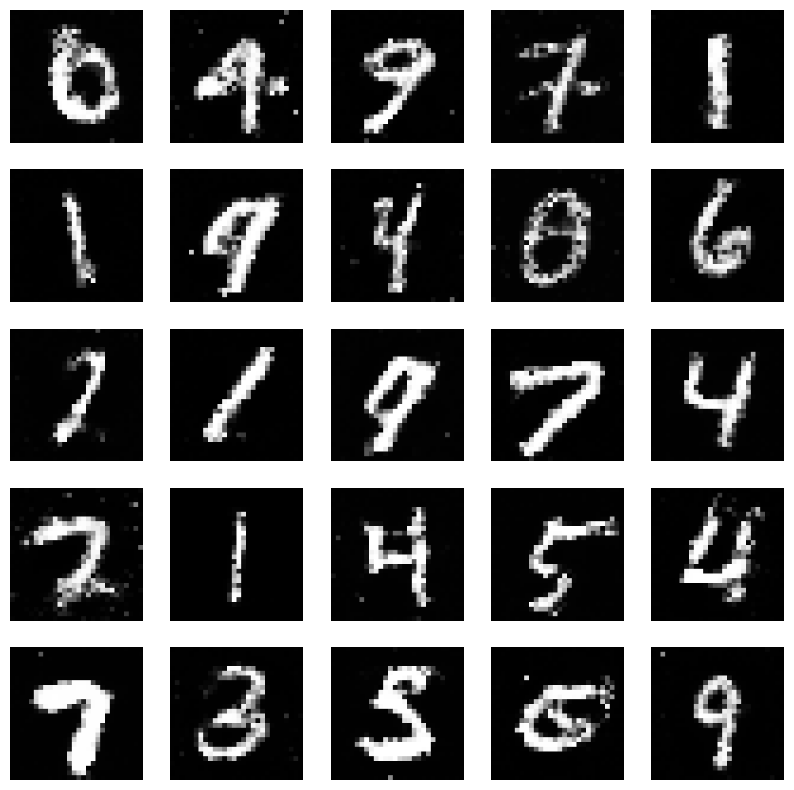

65


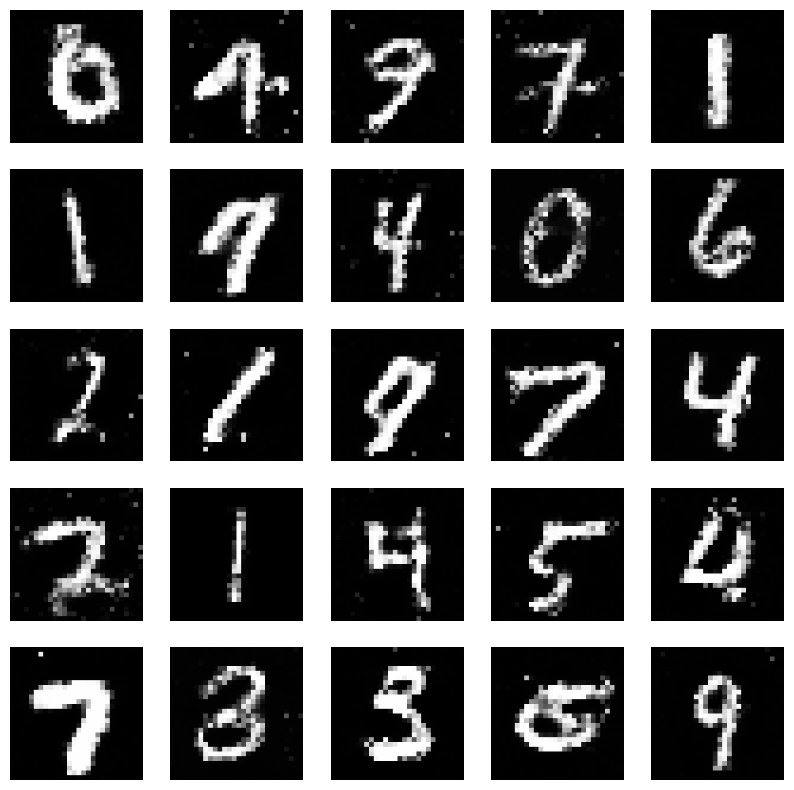

66


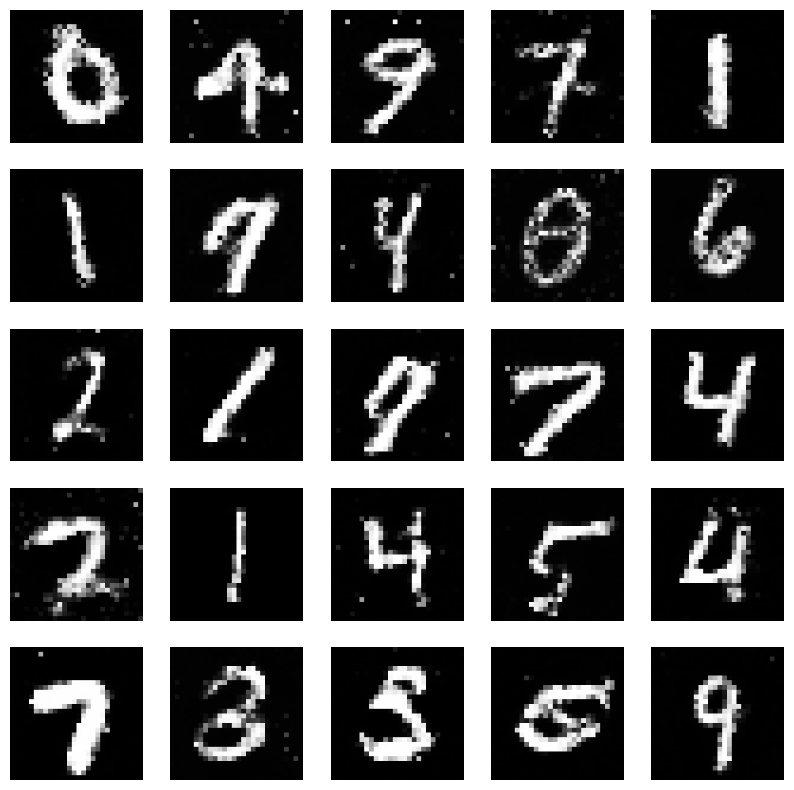

67


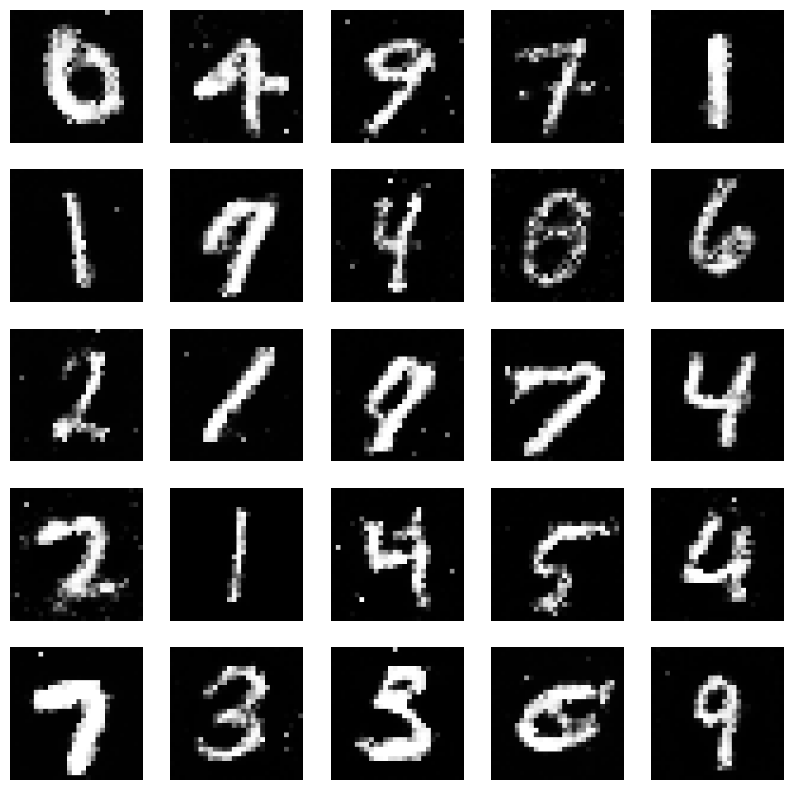

68


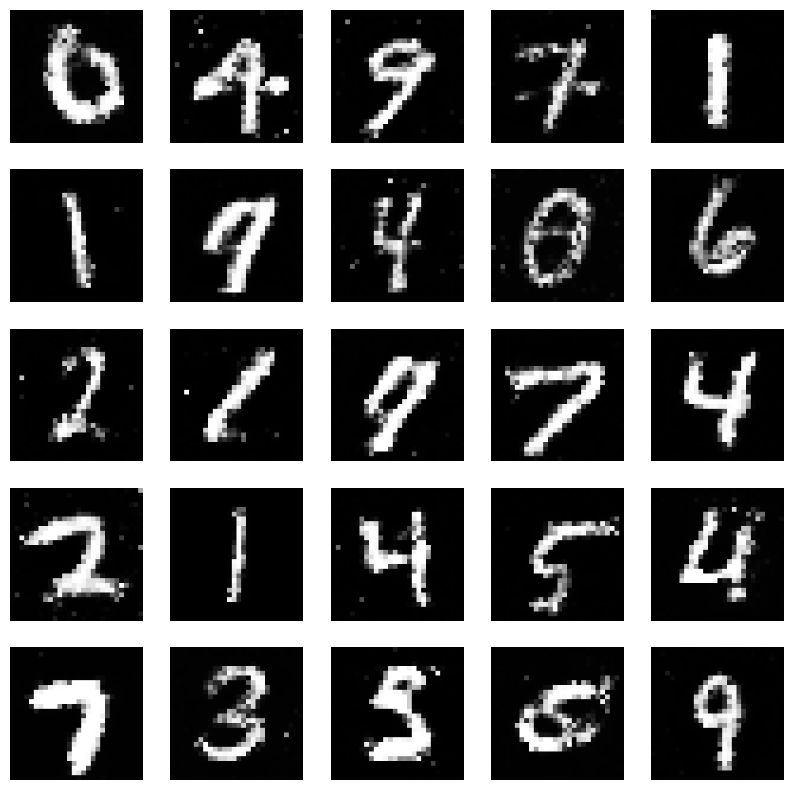

69


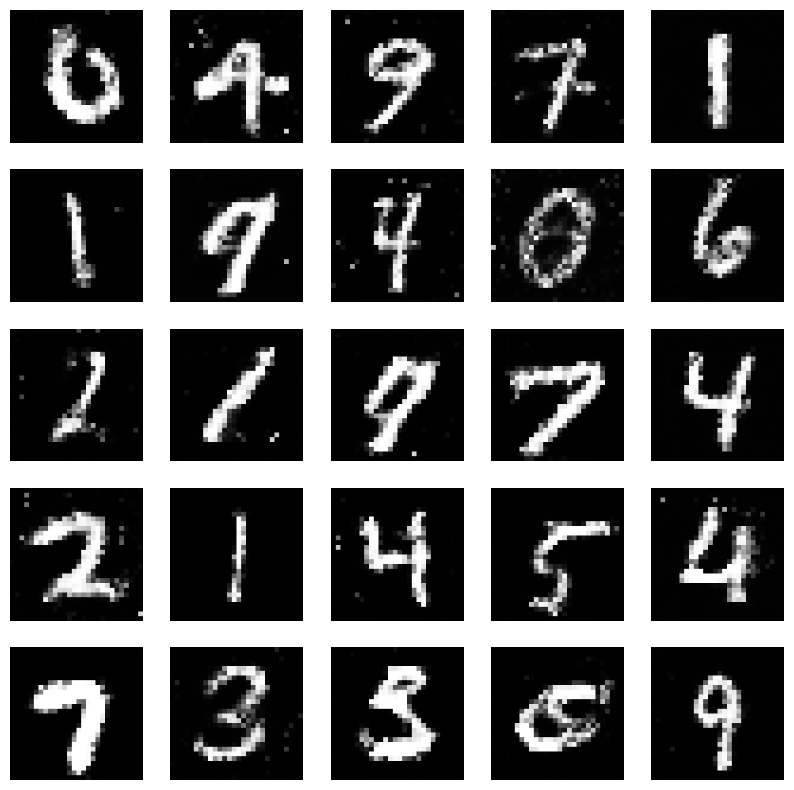

70


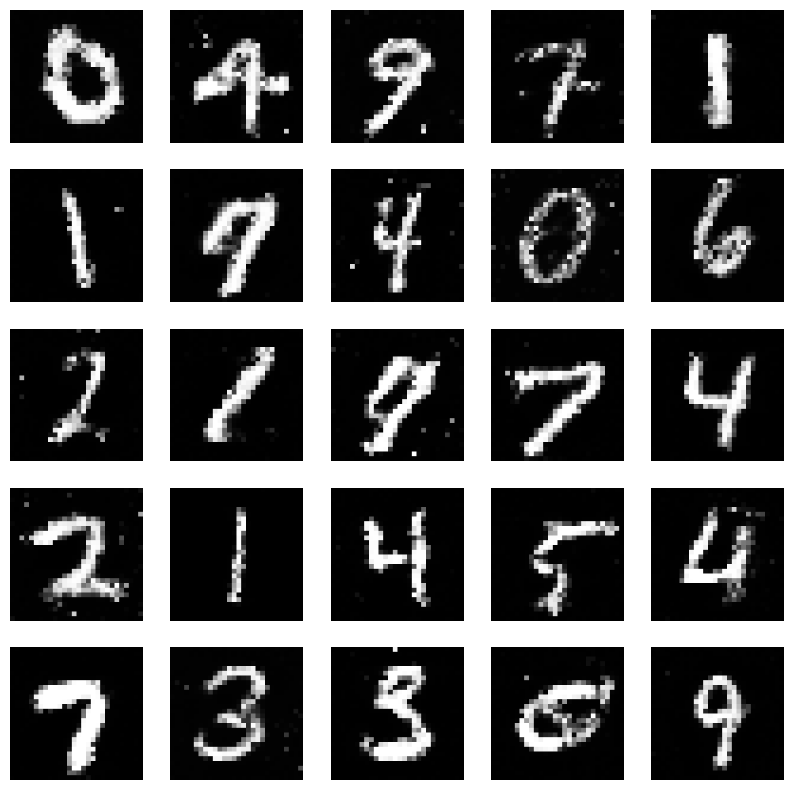

71


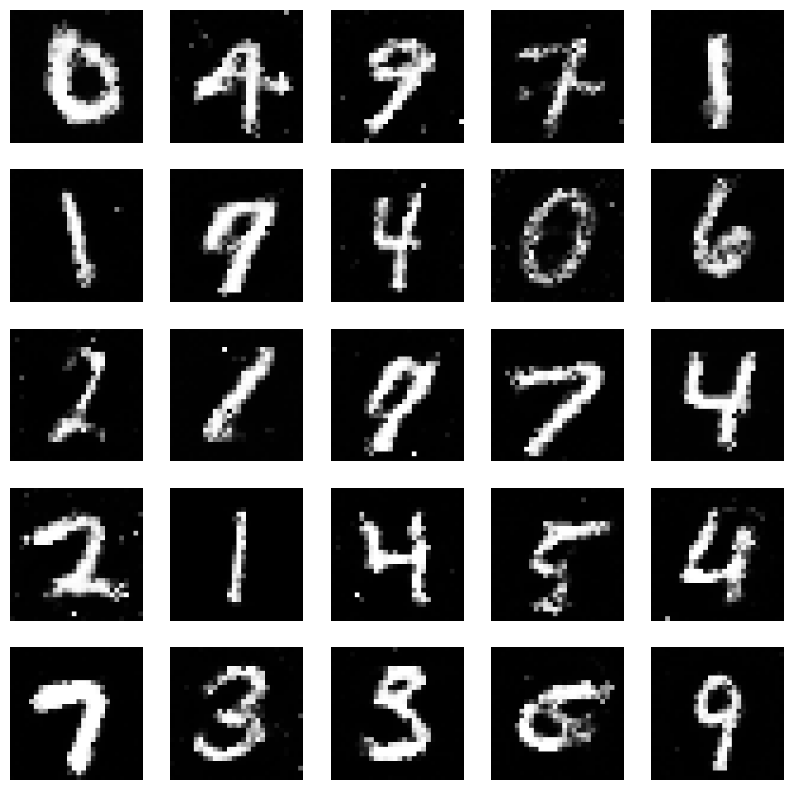

72


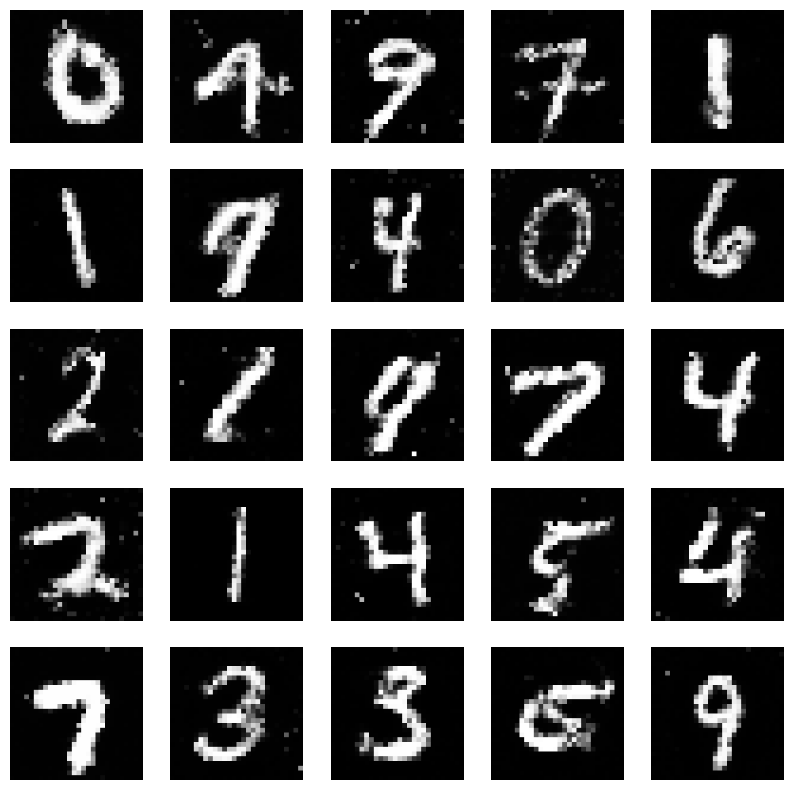

73


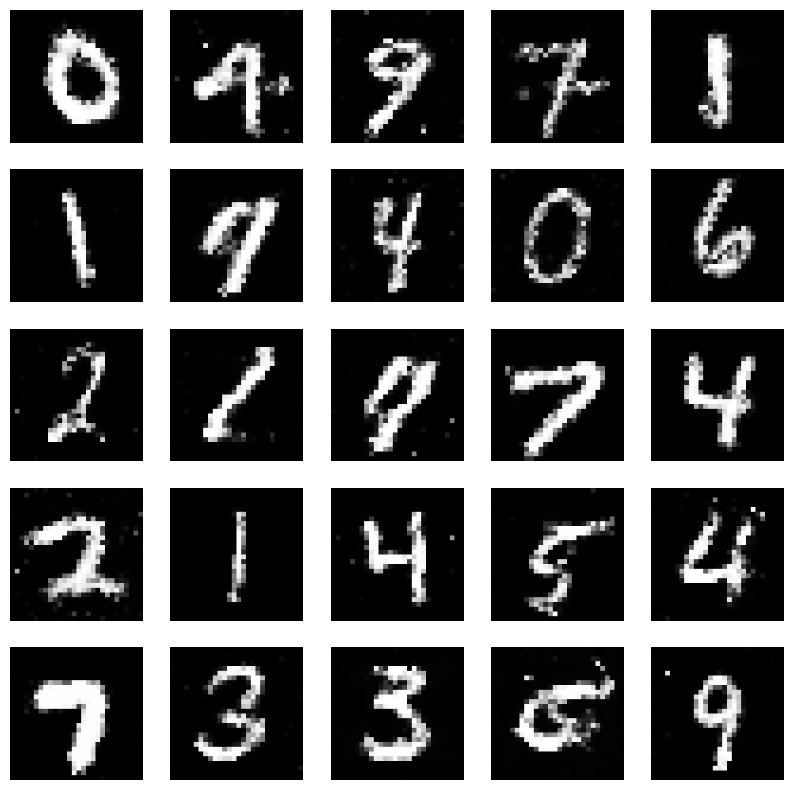

74


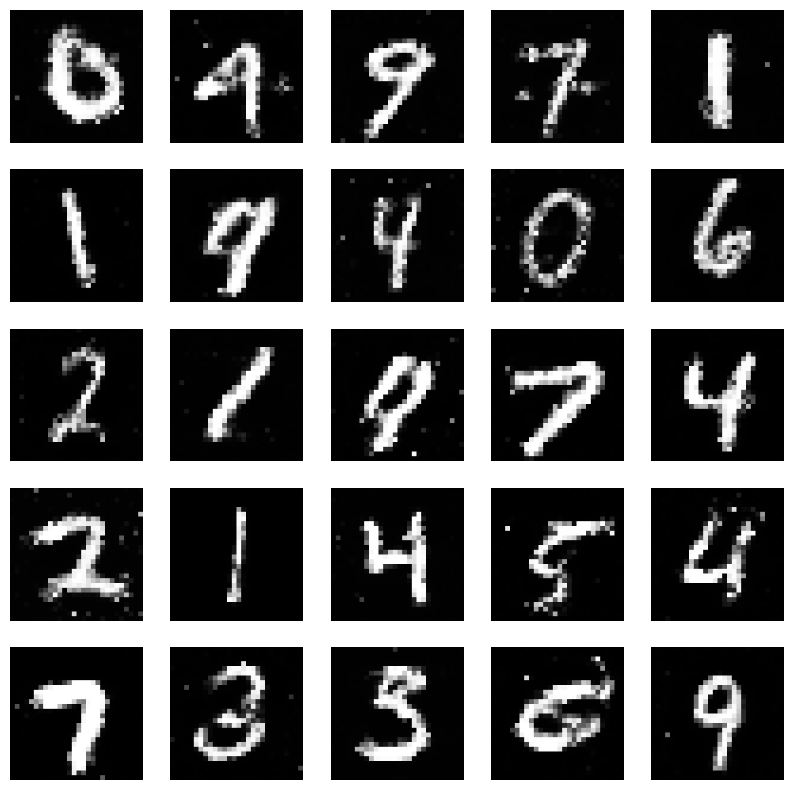

75


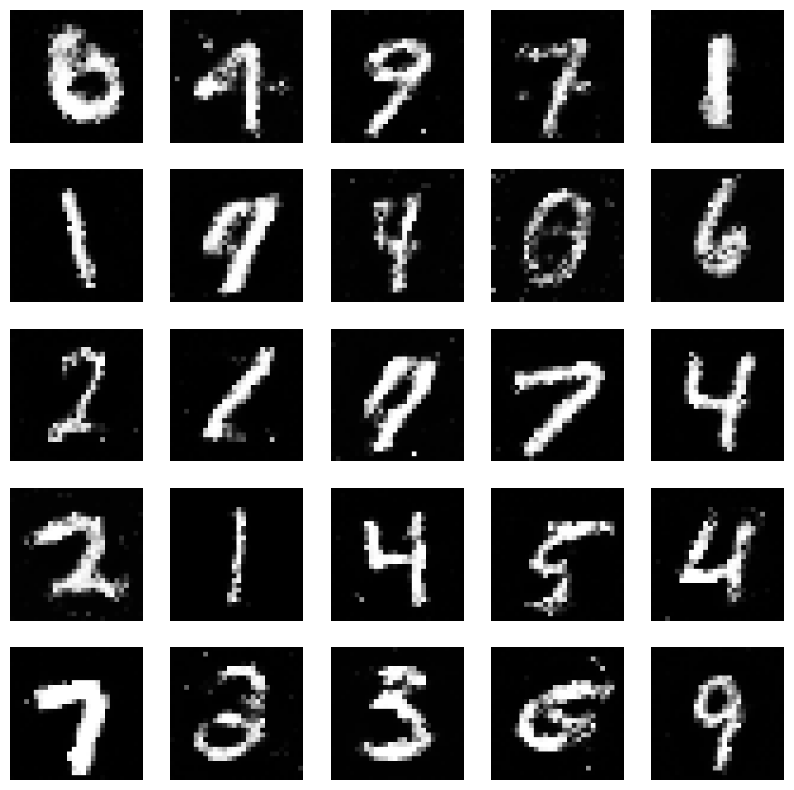

76


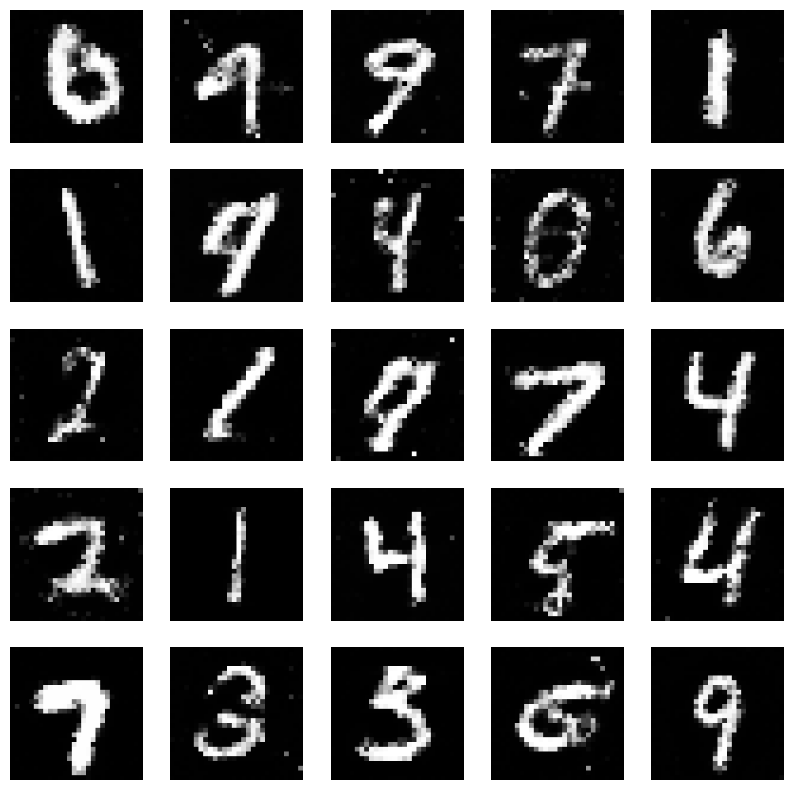

77


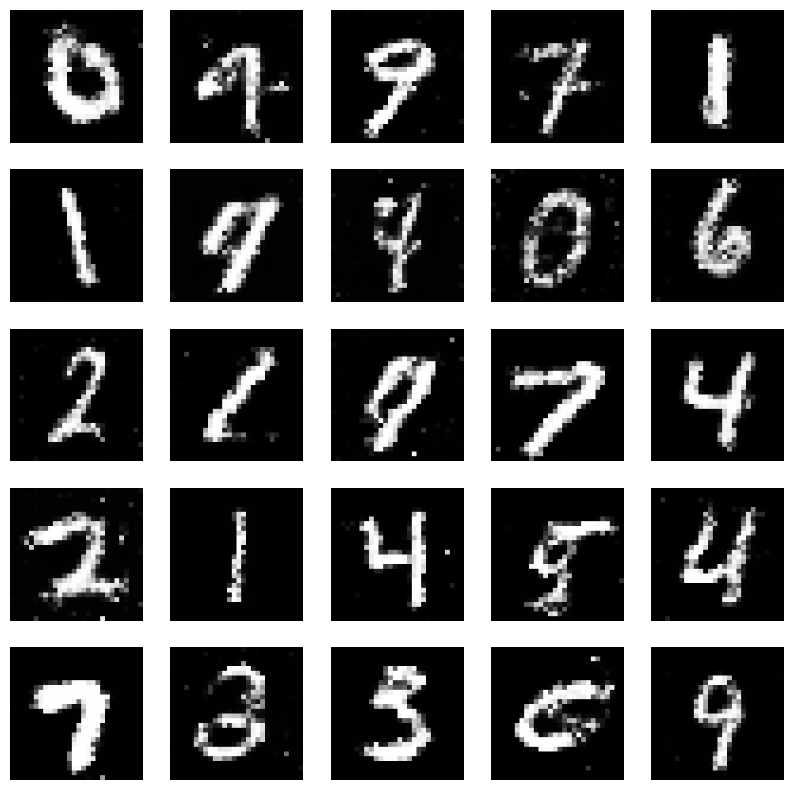

78


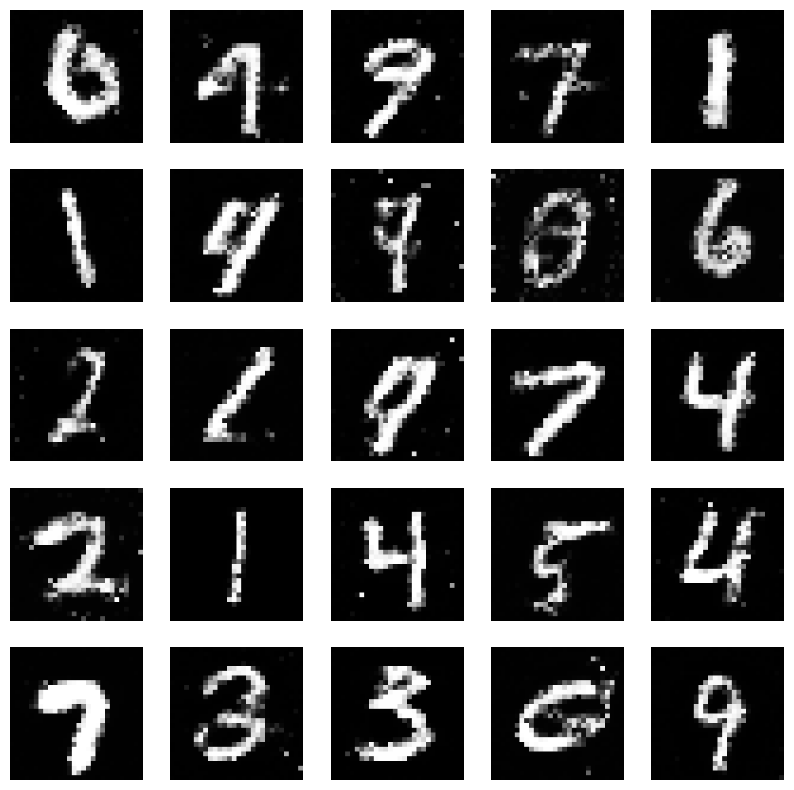

79


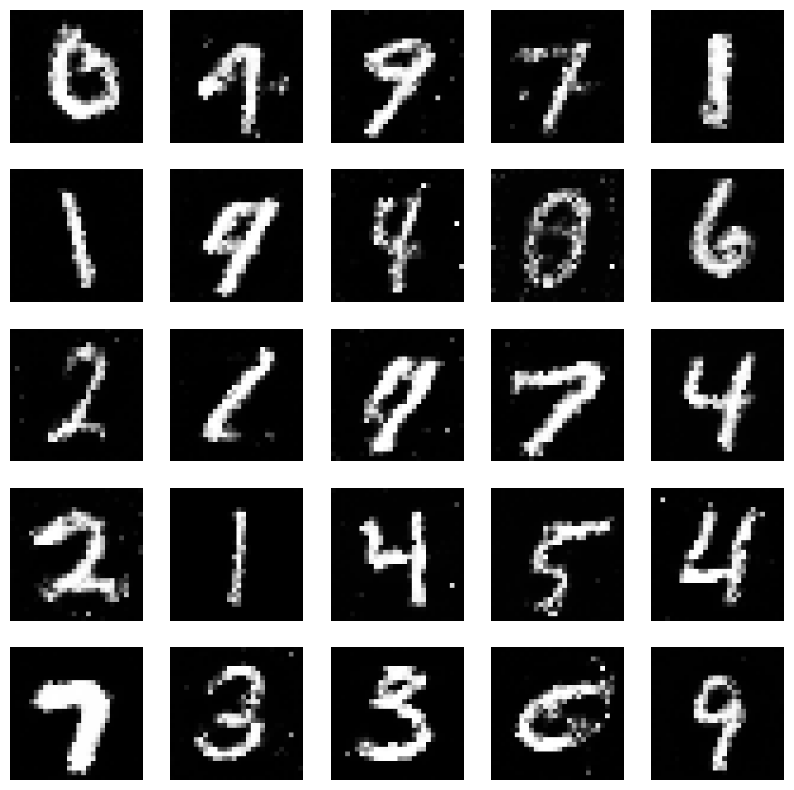

80


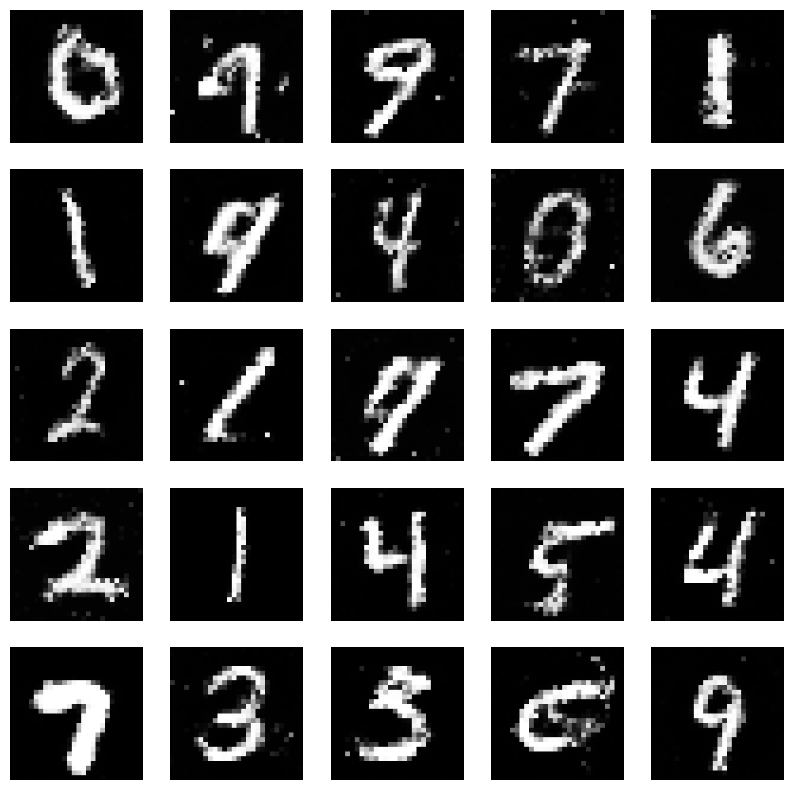

81


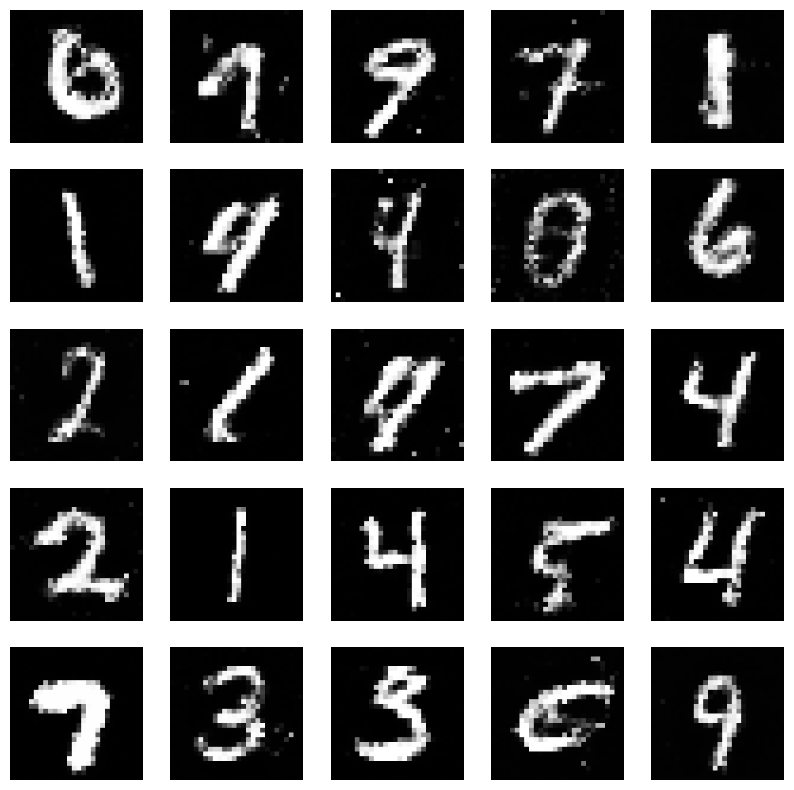

82


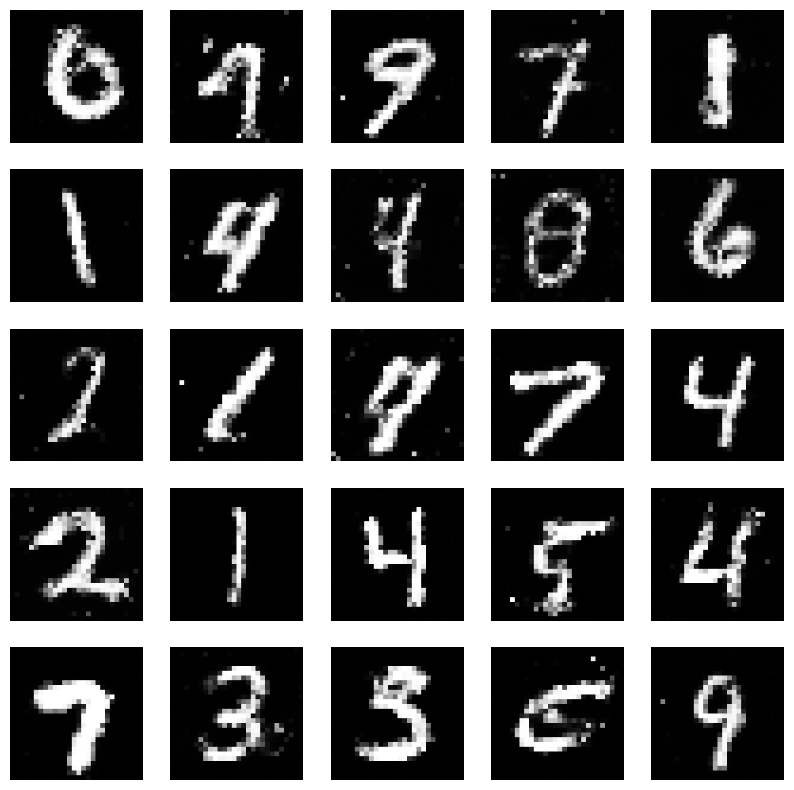

83


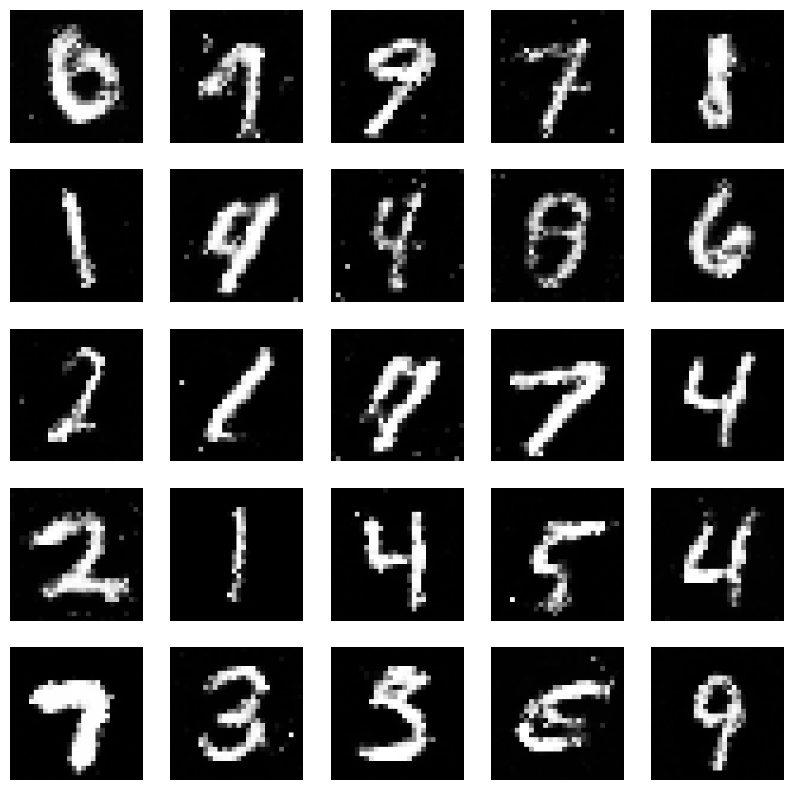

84


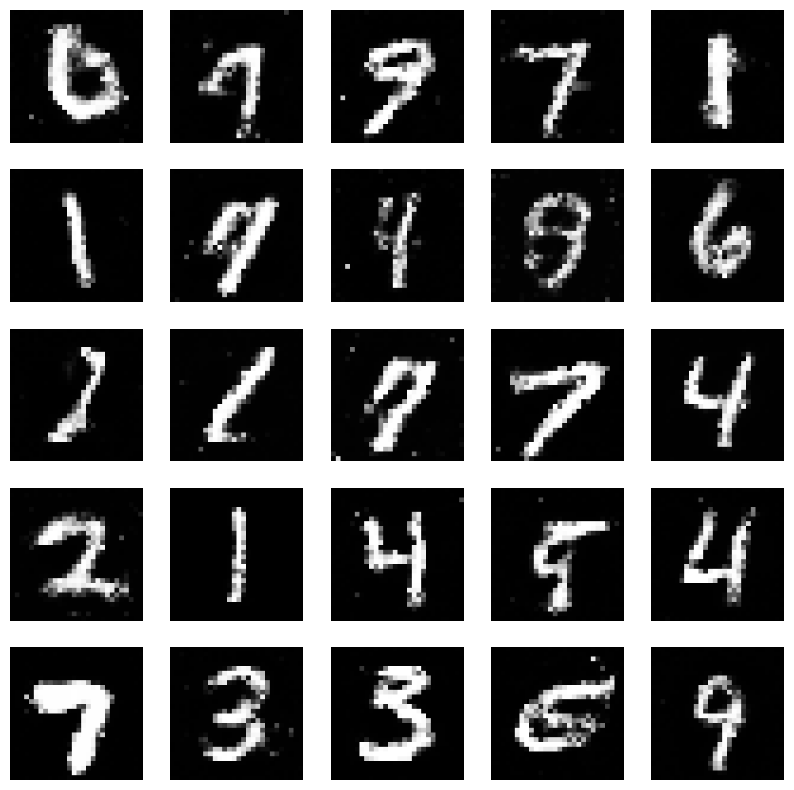

85


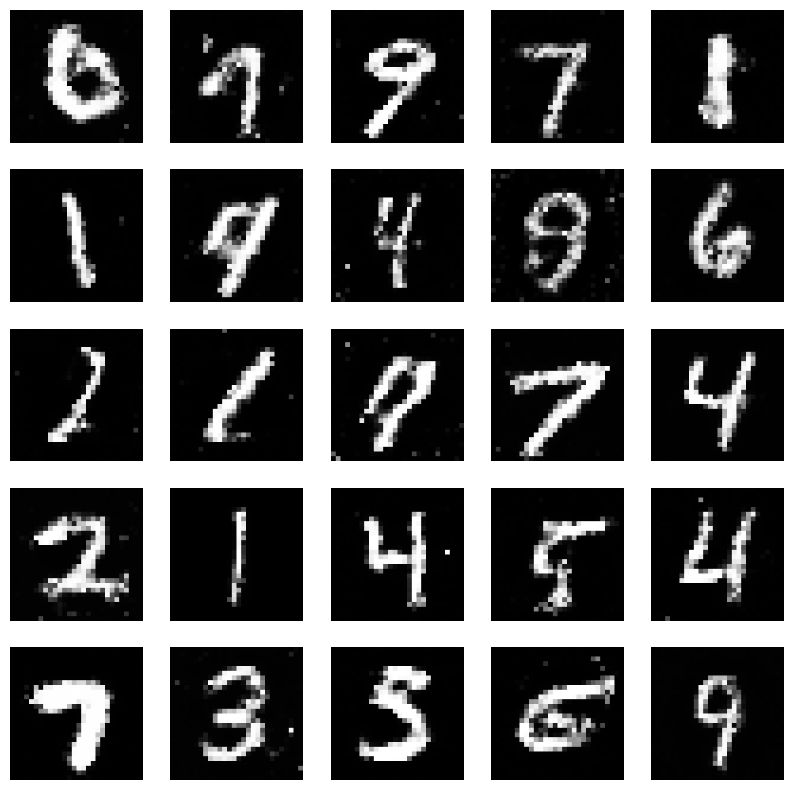

86


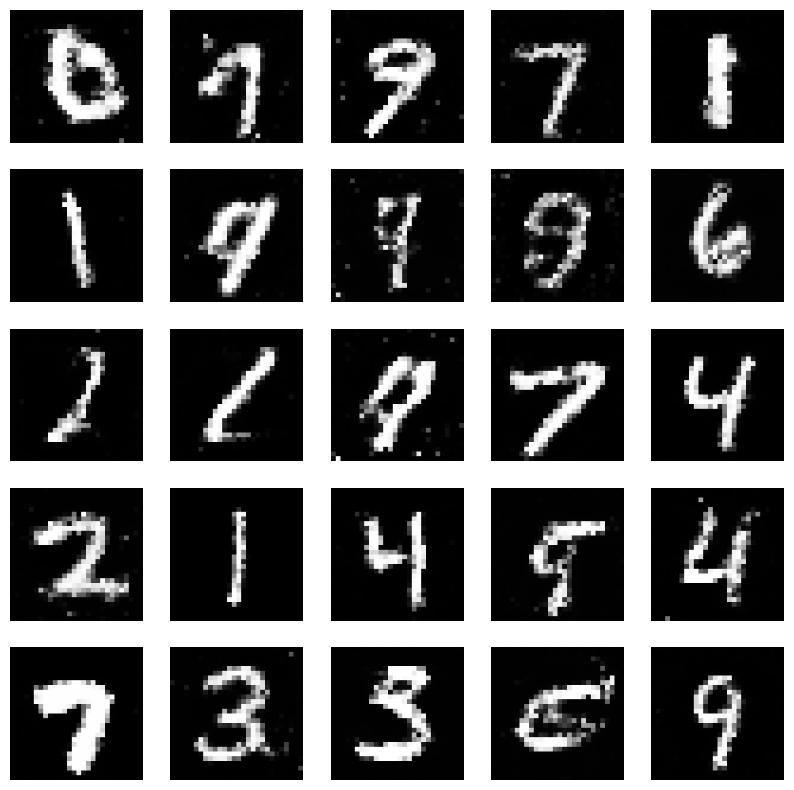

87


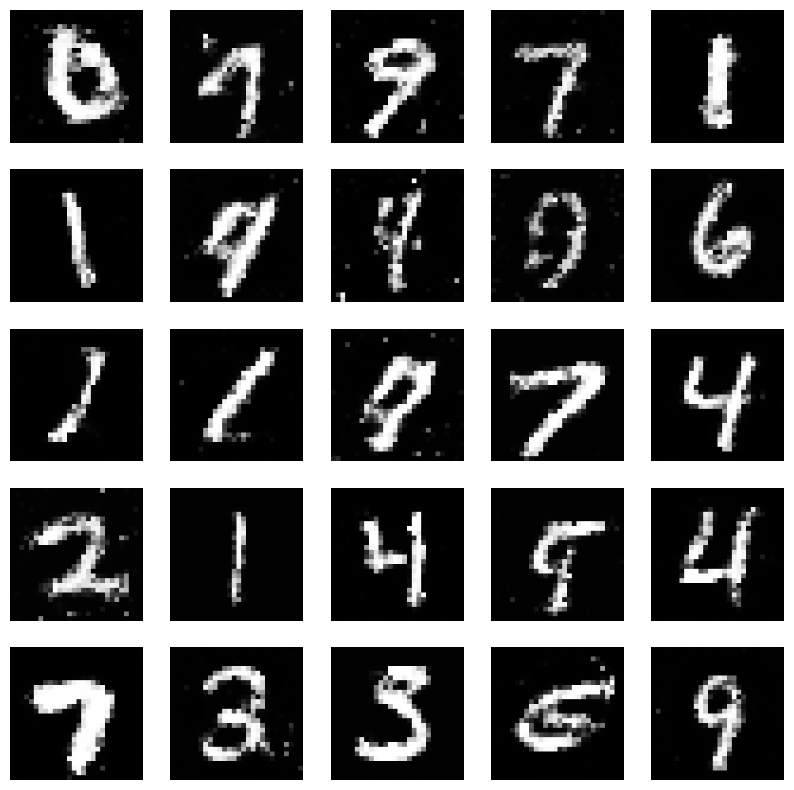

88


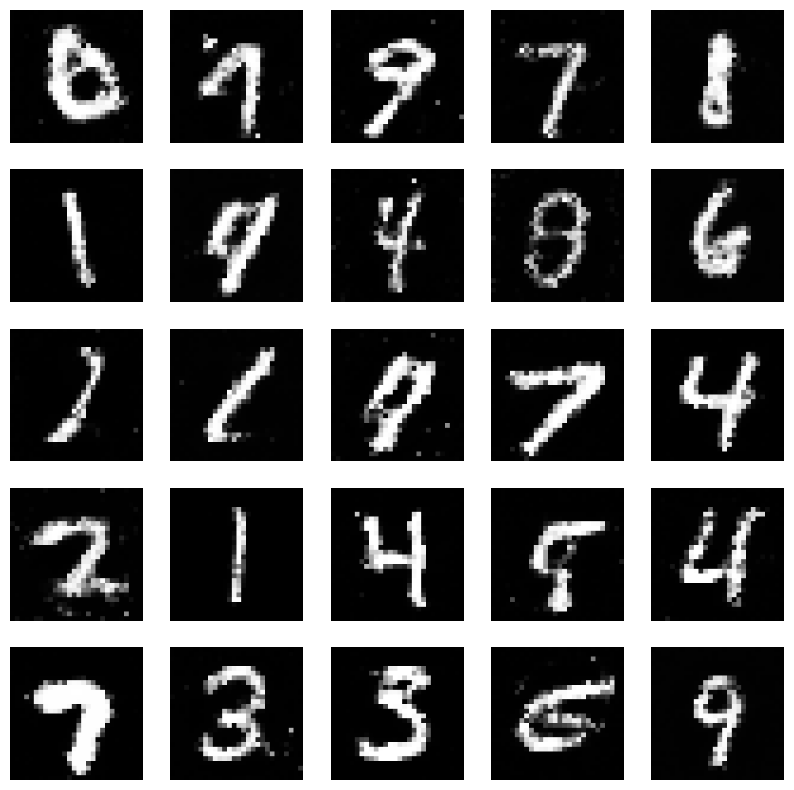

89


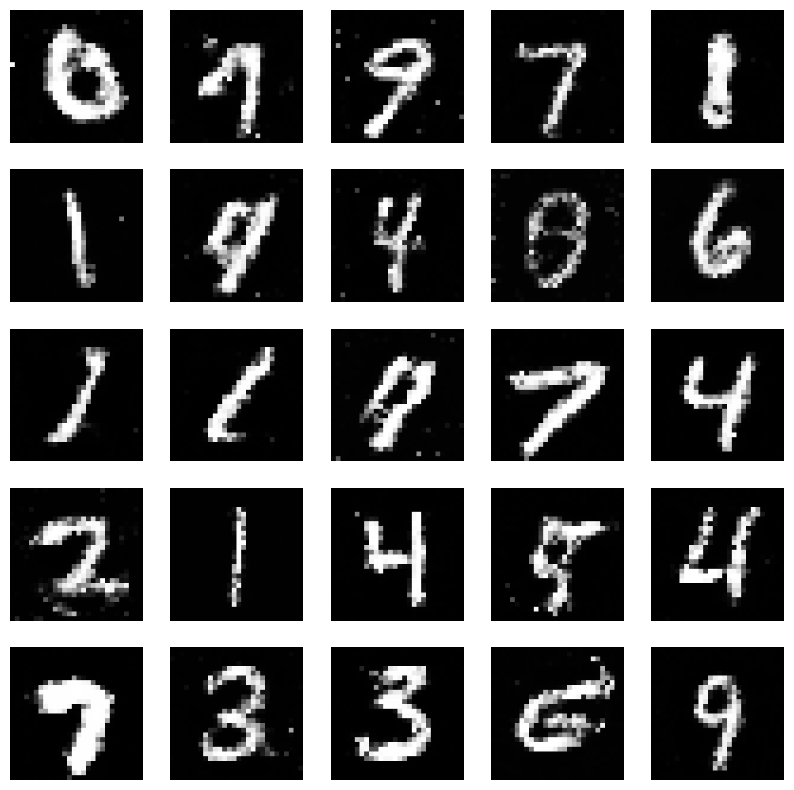

90


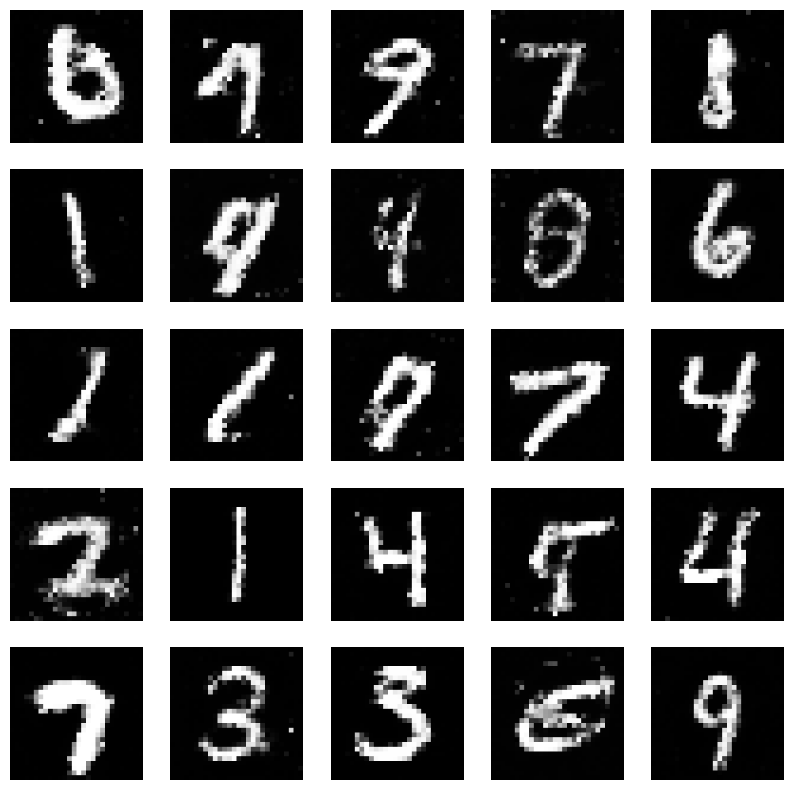

91


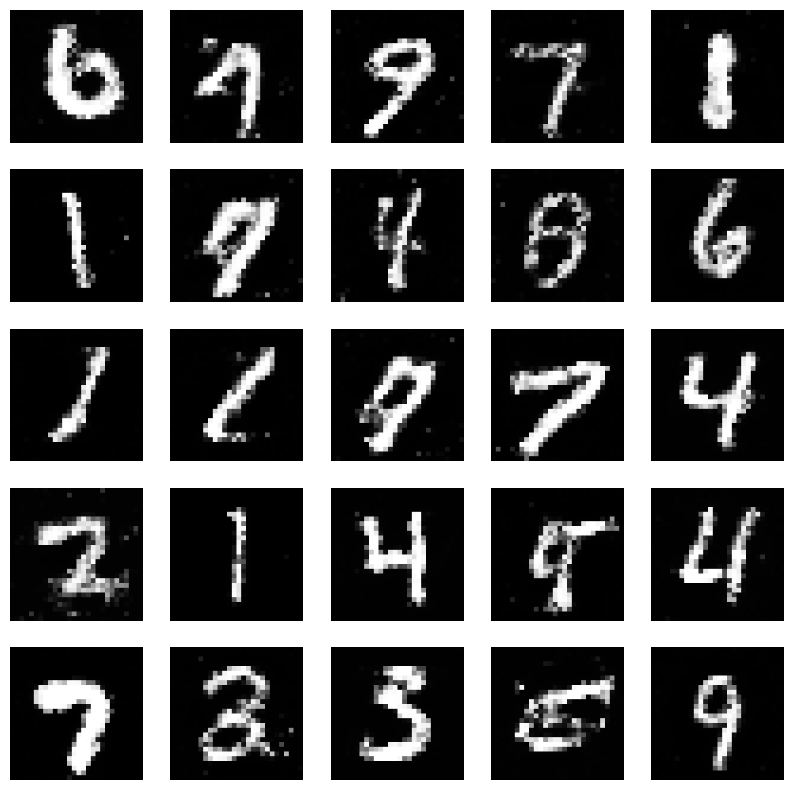

92


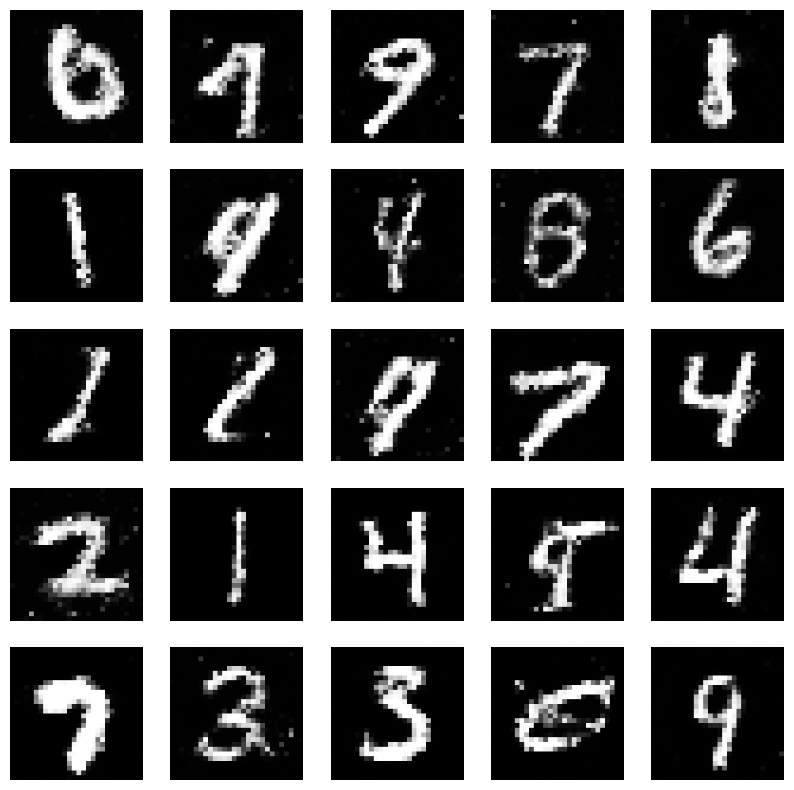

93


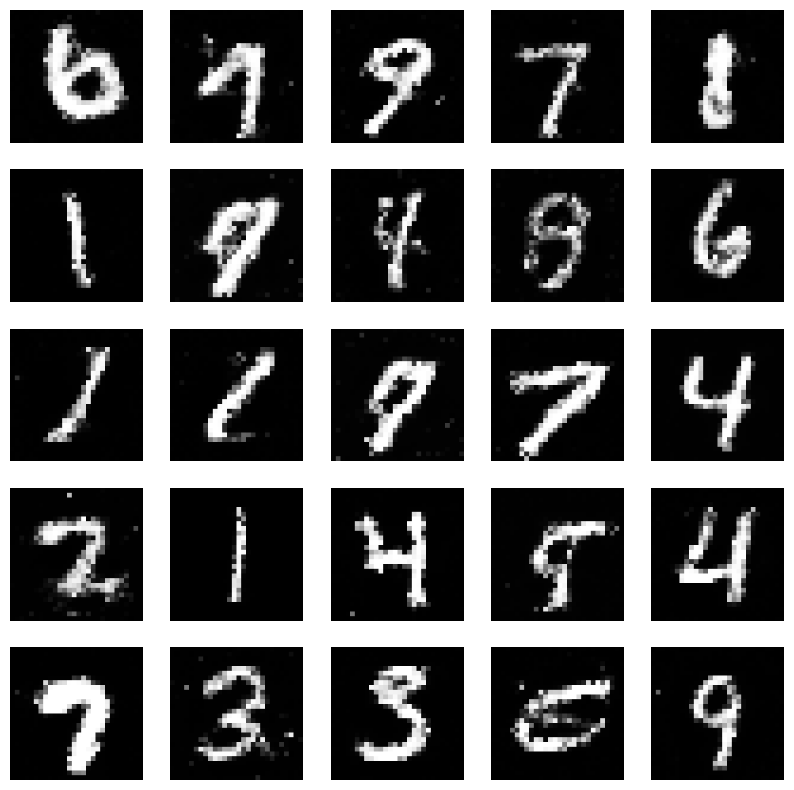

94


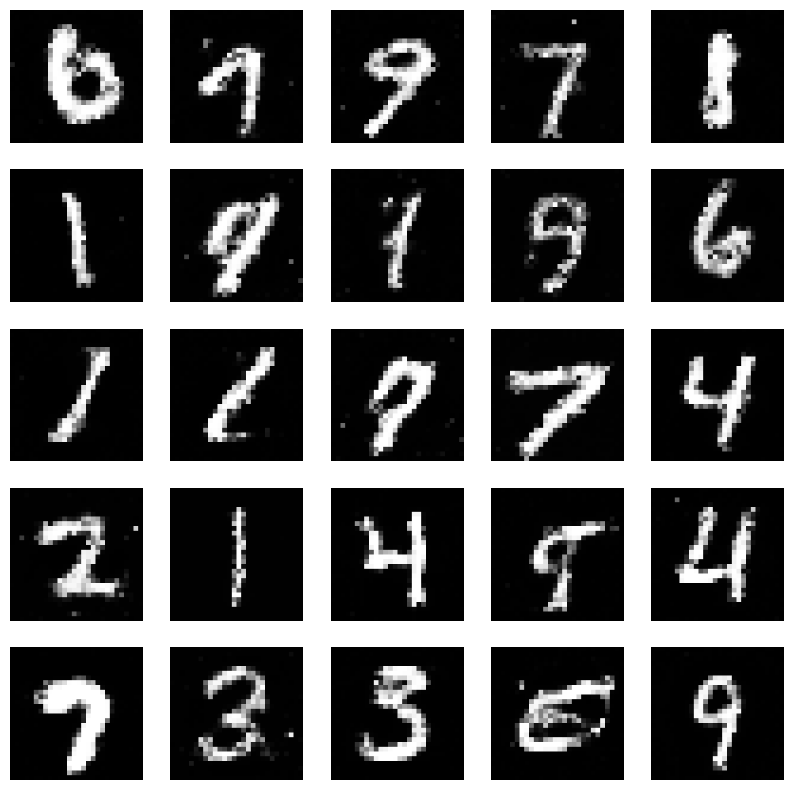

95


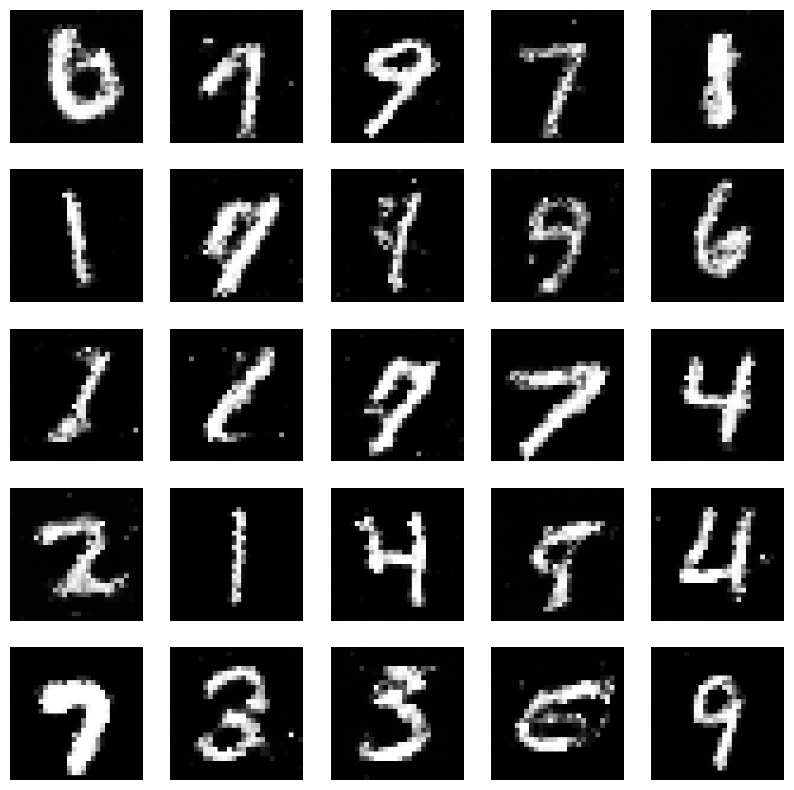

96


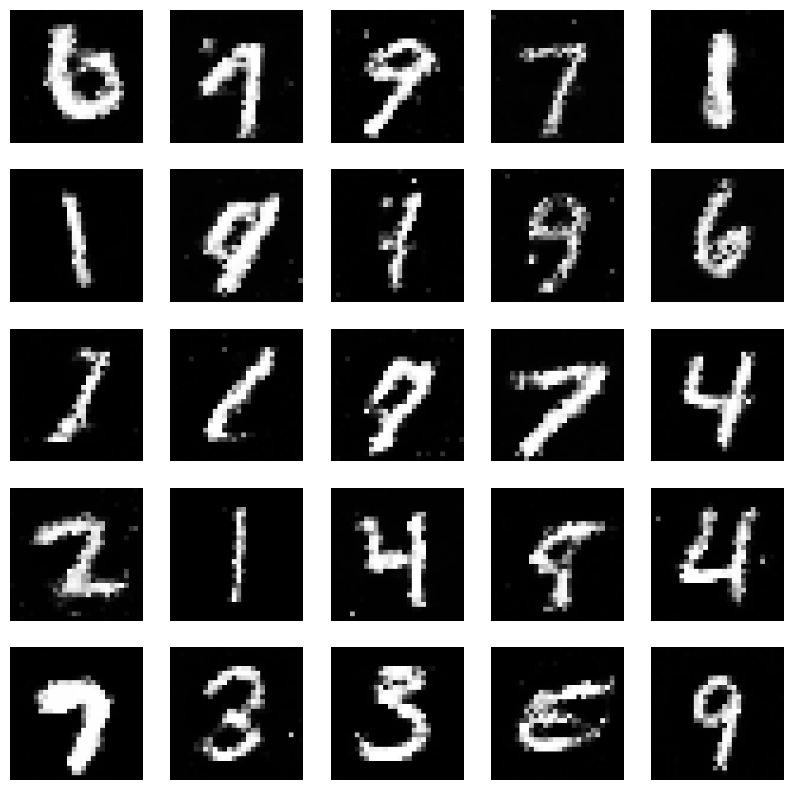

97


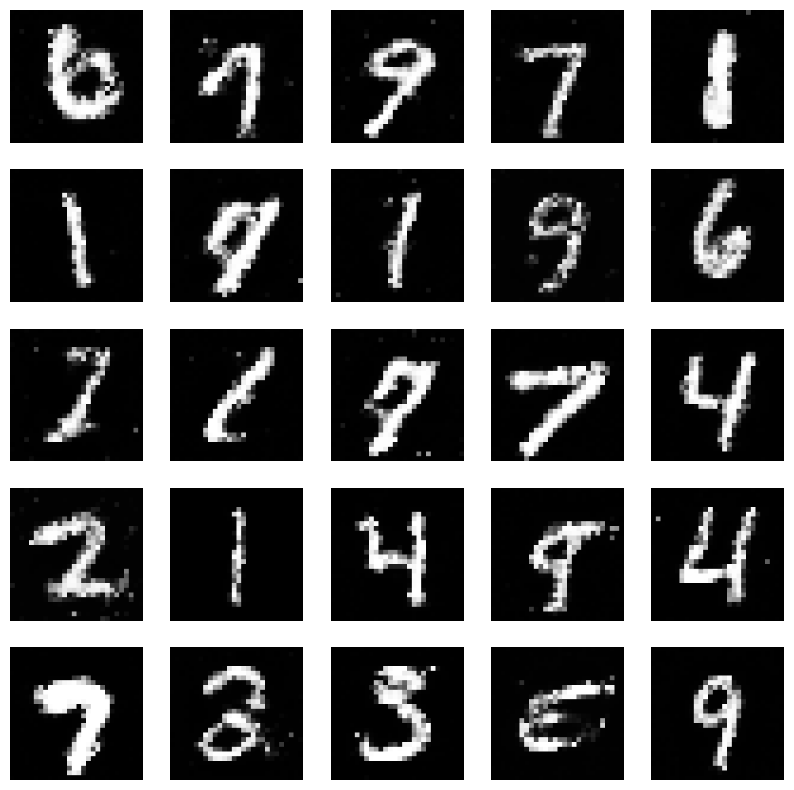

98


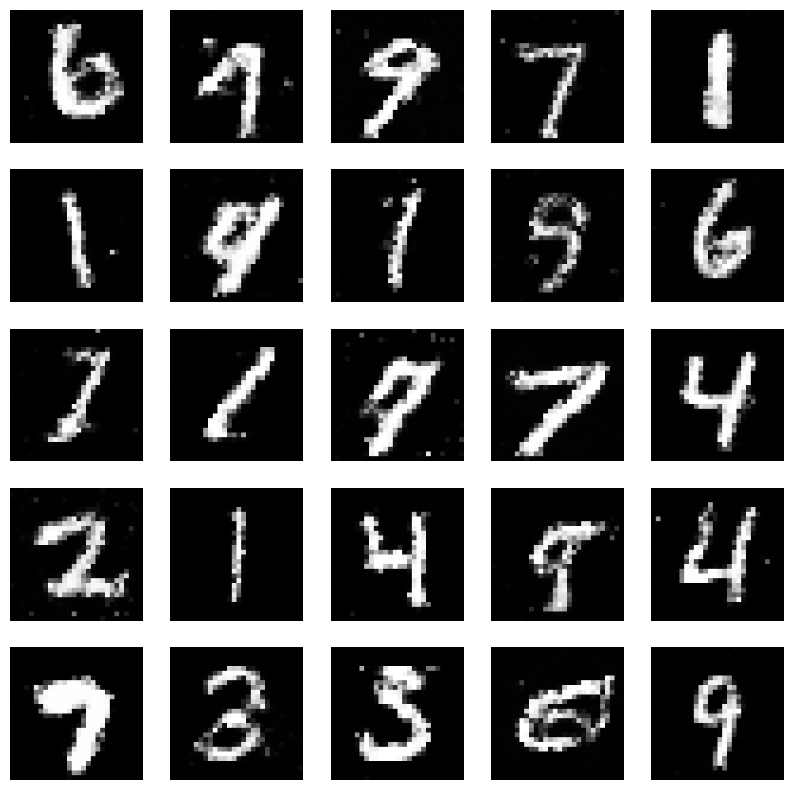

99


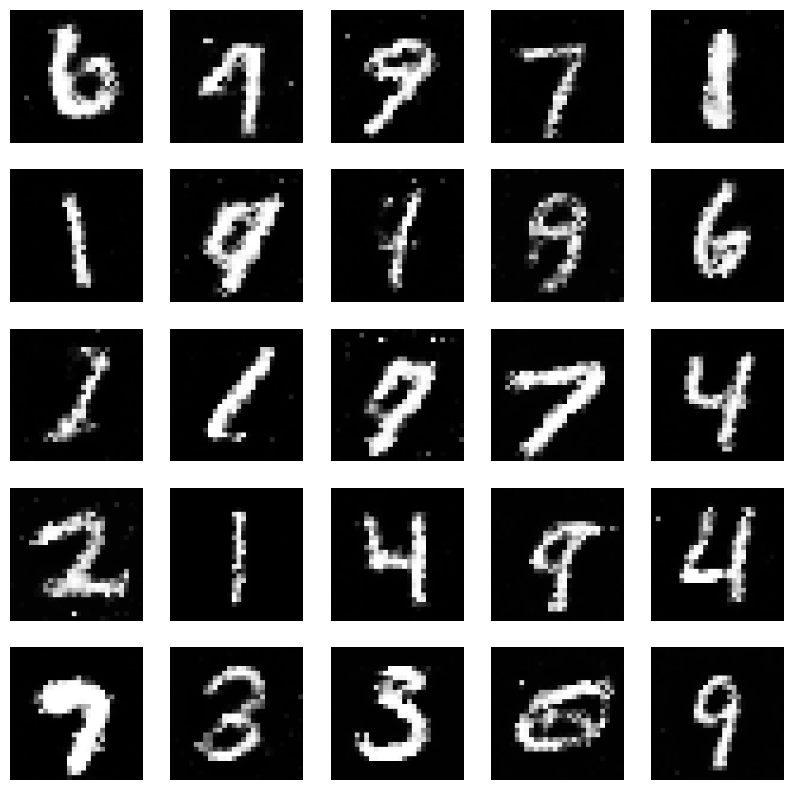

100


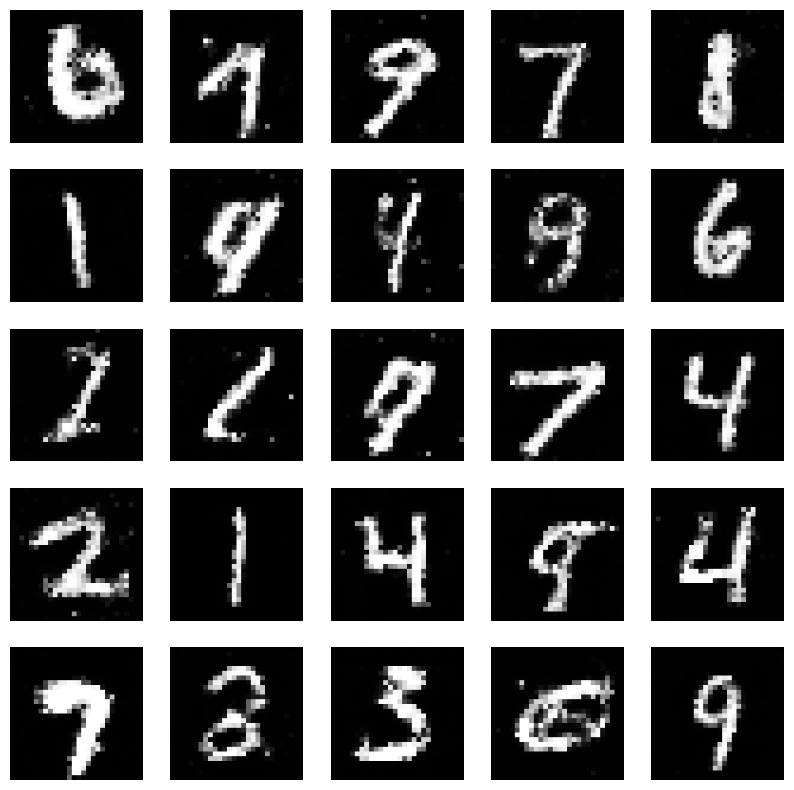

101


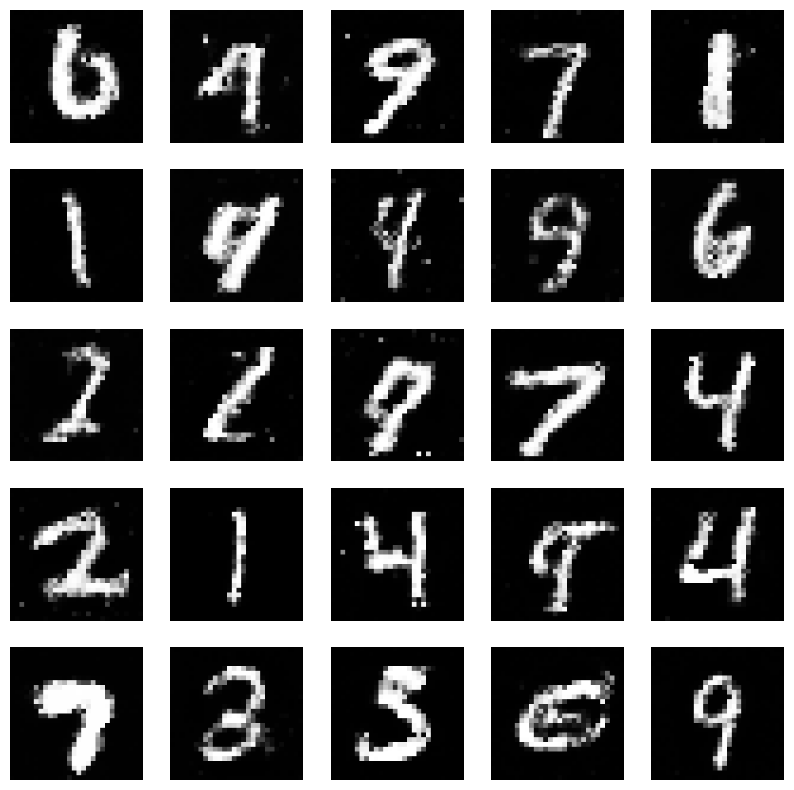

102


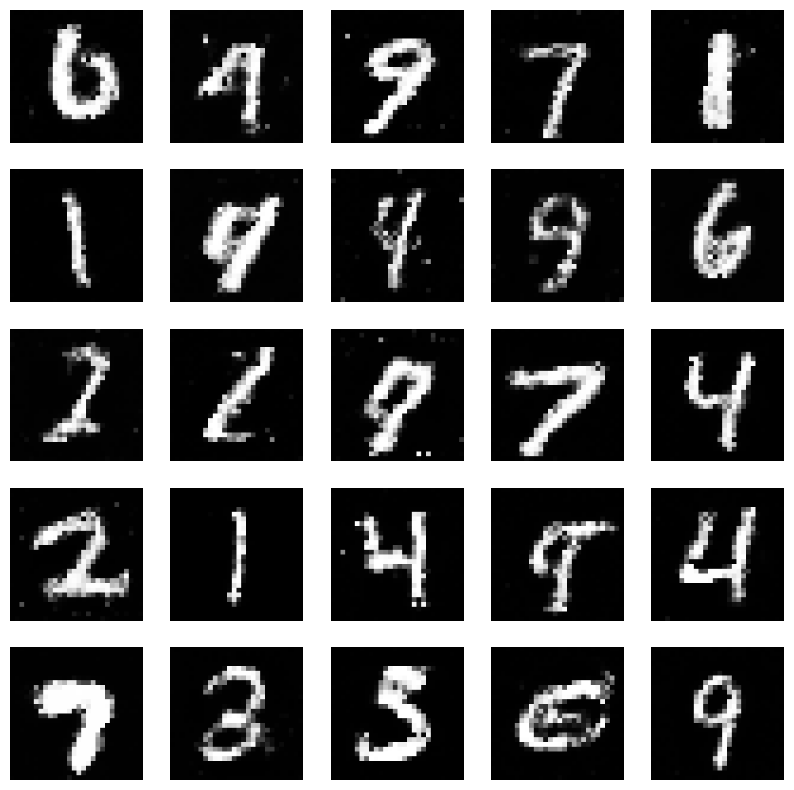

In [9]:
mkdir('gify')

for j in range(numbers): 
    print(j+1)
    w = 10
    h = 10
    fig = plt.figure(figsize=(10, 10))
    columns = 5
    rows = 5
    for i in range(1, 26):
        PATH = fr'images/{str(j).zfill(3)}/epoch_{str(j).zfill(3)}_img_{str(i-1).zfill(3)}.png'
        img = Image.open(PATH) 
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.savefig(fr'gify/{str(j+1).zfill(2)}.png')
    plt.show()